In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Datasets Descartados

## Listado de localidades con conectividad a Internet

In [6]:
df_tipo_conexion=pd.read_csv('Datasets\Listadodelocalidadesconconectividadainternet_2750221690224251927.csv')

In [7]:
df_tipo_conexion.head()

,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),SI,--,--,--,SI,SI,SI,--,--
1,BUENOS AIRES,9 de Julio,Carlos María Naón,--,--,--,--,SI,SI,SI,--,--
2,BUENOS AIRES,9 de Julio,Dudignac,--,--,SI,--,SI,SI,SI,SI,--
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),--,--,--,--,SI,--,--,--,--
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),SI,--,--,SI,SI,SI,SI,--,--


In [8]:
df_tipo_conexion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4311 entries, 0 to 4310
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provincia       4311 non-null   object
 1   Partido         4311 non-null   object
 2   Localidad       4311 non-null   object
 3   ADSL            4311 non-null   object
 4   Cablemódem      4311 non-null   object
 5   Dial Up         4311 non-null   object
 6   Fibra óptica    4311 non-null   object
 7   4G              4311 non-null   object
 8   3G              4311 non-null   object
 9   Telefonía Fija  4311 non-null   object
 10  Wireless        4311 non-null   object
 11  Satelital       4311 non-null   object
dtypes: object(12)
memory usage: 404.3+ KB


In [9]:
df_tipo_conexion.isnull().sum()

Provincia         0
Partido           0
Localidad         0
ADSL              0
Cablemódem        0
Dial Up           0
Fibra óptica      0
4G                0
3G                0
Telefonía Fija    0
Wireless          0
Satelital         0
dtype: int64

In [10]:
df_tipo_conexion.describe()

,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
count,4311,4311,4311,4311,4311,4311,4311,4311,4311,4311,4311,4311
unique,24,444,3912,2,2,2,2,2,2,2,2,2
top,BUENOS AIRES,General Roca,San Pedro,--,--,--,--,SI,--,SI,SI,--
freq,901,84,12,3182,3448,3908,2784,2574,2431,2243,2224,3248


In [11]:
subset_df = df_tipo_conexion.loc[df_tipo_conexion.eq("--").any(axis=1)]

In [12]:
subset_df

,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),SI,--,--,--,SI,SI,SI,--,--
1,BUENOS AIRES,9 de Julio,Carlos María Naón,--,--,--,--,SI,SI,SI,--,--
2,BUENOS AIRES,9 de Julio,Dudignac,--,--,SI,--,SI,SI,SI,SI,--
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),--,--,--,--,SI,--,--,--,--
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),SI,--,--,SI,SI,SI,SI,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...
4305,BUENOS AIRES,Pilar,Maquinista F. Savio (oeste),--,--,--,--,SI,SI,--,SI,--
4307,BUENOS AIRES,Pilar,Presidente Derqui,SI,SI,--,SI,SI,SI,SI,SI,--
4308,BUENOS AIRES,Pilar,Roberto De Vicenzo,--,--,--,--,SI,SI,--,--,--
4309,BUENOS AIRES,Pilar,Santa Teresa,--,--,--,--,SI,SI,--,--,SI


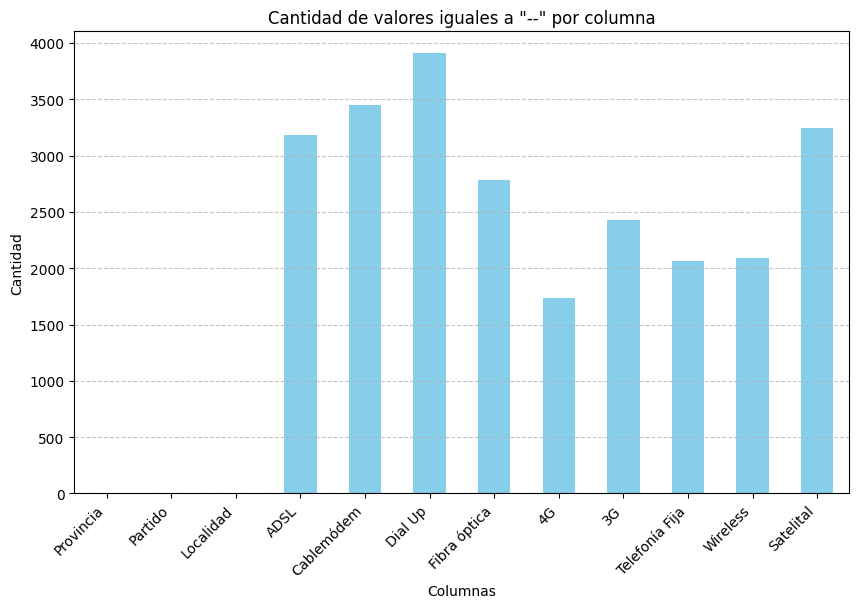

In [13]:
# Contar la cantidad de valores iguales a "--" en cada columna
count_values = (df_tipo_conexion == "--").sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
count_values.plot(kind='bar', color='skyblue')
plt.title('Cantidad de valores iguales a "--" por columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.show()

### Descartamos el dataset porque posee muchos valores que no podemos identificar bien que representan, al mismo tiempo podemos inferir la información de manera mas precisa con el dataset de Internet_Accesos-por-tecnologia.csv

## Accesos a Internet fijo por velocidad bajada y provincia

In [14]:
internet_fijo_veloc_bajada_prov = pd.read_csv('Datasets\AccesosaInternetfijoporvelocidadbajadayprovincia.csv')

In [15]:
internet_fijo_veloc_bajada_prov.head()

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,70 Mbps,71 Mbps,75 Mbps,77 Mbps,78 Mbps,80 Mbps,81 Mbps,83 Mbps,82 Mbps,86 Mbps
0,2022.0,3.0,Buenos Aires,"65,821",19,- 0,- 0,"29,774",192,"4,611",...,"3,163",- 0,"98,387",- 0,2,223,- 0,1,- 0,- 0
1,2022.0,3.0,Capital Federal,"105,477",31,- 0,- 0,451,35,"1,307",...,3,- 0,"30,482",- 0,- 0,8,- 0,- 0,- 0,- 0
2,2022.0,3.0,Catamarca,"2,208",- 0,- 0,- 0,34,37,- 0,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
3,2022.0,3.0,Chaco,"3,711",- 0,225,111,234,2,- 0,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
4,2022.0,3.0,Chubut,"20,024",8,- 0,- 0,69,32,836,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0


In [16]:
internet_fijo_veloc_bajada_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 97 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Año         480 non-null    float64
 1   Trimestre   480 non-null    float64
 2   Provincia   480 non-null    object 
 3   Otros       480 non-null    object 
 4   0,256 Mbps  480 non-null    object 
 5   0,375 Mbps  480 non-null    object 
 6   0,625 Mbps  480 non-null    object 
 7   0,5 Mbps    480 non-null    object 
 8   0,512 Mbps  480 non-null    object 
 9   0,75 Mbps   480 non-null    object 
 10  1 Mbps      480 non-null    object 
 11  1,2 Mbps    480 non-null    object 
 12  1,25 Mbps   480 non-null    object 
 13  1,5 Mbps    480 non-null    object 
 14  2 Mbps      480 non-null    object 
 15  2,2 Mbps    480 non-null    object 
 16  2,5 Mbps    481 non-null    object 
 17  6,7 Mbps    480 non-null    object 
 18  3 Mbps      480 non-null    object 
 19  3,2 Mbps    480 non-null    o

In [17]:
internet_fijo_veloc_bajada_prov.isnull().sum()

Año           1
Trimestre     1
Provincia     1
Otros         1
0,256 Mbps    1
             ..
80 Mbps       1
81 Mbps       1
83 Mbps       1
82 Mbps       1
86 Mbps       1
Length: 97, dtype: int64

In [18]:
internet_fijo_veloc_bajada_prov.describe()

,Año,Trimestre
count,480.000000,480.0000
mean,2019.750000,2.5000
std,1.480563,1.1192
min,2017.000000,1.0000
25%,2018.750000,1.7500
50%,2020.000000,2.5000
75%,2021.000000,3.2500
max,2022.000000,4.0000


### Graficamos la cantidad de valores que possen como dato "- 0"

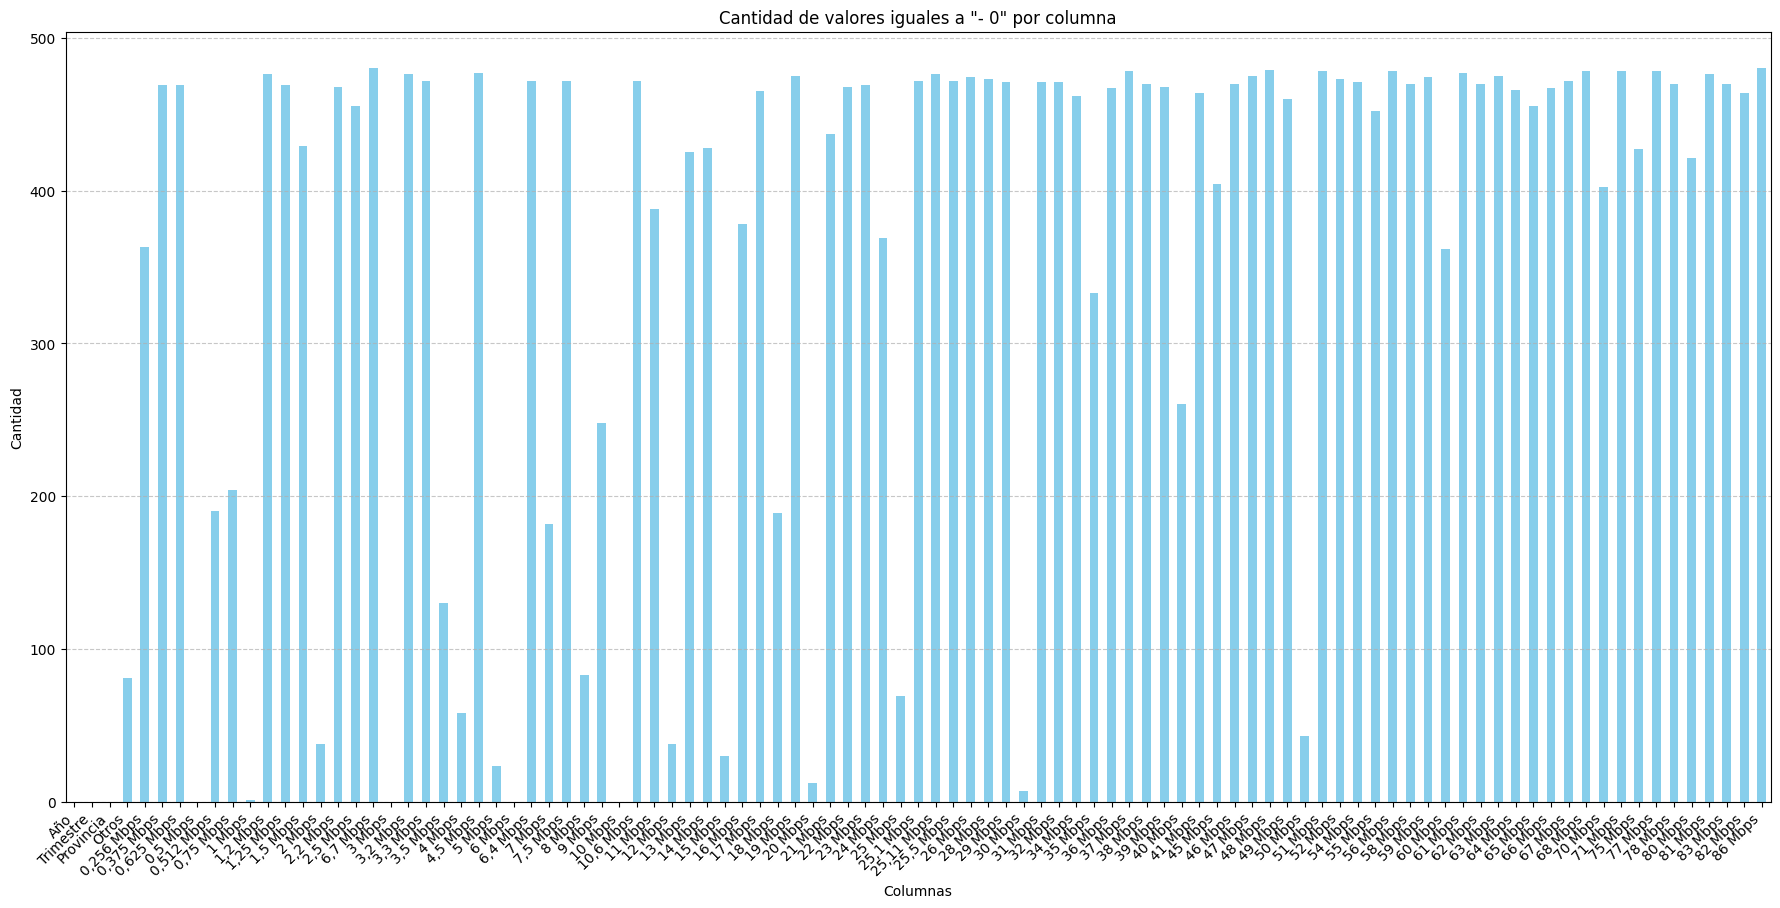

In [19]:
# Contar la cantidad de valores iguales a "- 0" en cada columna
count_values = (internet_fijo_veloc_bajada_prov == "- 0").sum()

# Crear el gráfico de barras
plt.figure(figsize=(22, 10))
count_values.plot(kind='bar', color='skyblue')
plt.title('Cantidad de valores iguales a "- 0" por columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.show()

### Este dataste lo descartamos sobre todo por tener mucha información obsoleta. Otros datasets nos aportan información mas útil y actualizada, como por ej. Internet_Accesos-por-velocidad.csv

In [20]:
df_acc_banda_ancha_angosta = pd.read_csv('Datasets_normalizados\Internet_Accesos-por-velocidad2.csv')

In [21]:
df_acc_banda_ancha_angosta.head(3)

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2022,3,33.013,96.727,1.161.370,1.151.906,823.505,479.822,6.995.750,349.035,11.091.128
1,2022,2,33.667,99.498,1.193.090,1.197.030,856.562,485.321,6.741.922,351.594,10.958.684
2,2022,1,34.890,104.840,1.263.273,1.209.148,967.508,509.830,6.336.187,198.333,10.624.009


In [22]:
df_acc_banda_ancha_angosta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Año                      35 non-null     int64  
 1   Trimestre                35 non-null     int64  
 2   Hasta 512 kbps           35 non-null     float64
 3   Entre 512 Kbps y 1 Mbps  35 non-null     float64
 4   Entre 1 Mbps y 6 Mbps    35 non-null     object 
 5   Entre 6 Mbps y 10 Mbps   35 non-null     object 
 6   Entre 10 Mbps y 20 Mbps  35 non-null     object 
 7   Entre 20 Mbps y 30 Mbps  35 non-null     object 
 8   Más de 30 Mbps           35 non-null     object 
 9   OTROS                    35 non-null     float64
 10  Total                    35 non-null     object 
dtypes: float64(3), int64(2), object(6)
memory usage: 3.1+ KB


### Descartamos este dataset porque su informacion puede ser inferida de el dataset "Internet_Accesos-por-velocidad.csv" que tambien inclueye informacion sobre las provincias

## Historico velocidad

In [23]:
df_historico_velocidad = pd.read_csv('Datasets_normalizados\historico_velocidad_internet.csv')

In [24]:
df_historico_velocidad.head(3)

,Año,Trimestre,Mbps (Media de bajada),Periodo
0,2022,3,62.46,Jul-Sept 2022
1,2022,2,58.44,Abr-Jun 2022
2,2022,1,55.11,Ene-Mar 2022


In [25]:
df_historico_velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     35 non-null     int64  
 1   Trimestre               35 non-null     int64  
 2   Mbps (Media de bajada)  35 non-null     float64
 3   Periodo                 35 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.2+ KB


### Descartamos este dataset porque podemos inferir su informacion del dataset "historico_velocidad_internet (2).csv" que ademas cuenta con informacion de provincias

### Fin de datasets descartados

## Analisis Exploratorio: Internet Banda Ancha/Fija Total

In [26]:
df_internet_baf_total = pd.read_csv('Datasets_normalizados/Internet_BAF_total.csv')

In [27]:
df_internet_baf_total.head()

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,3,11078691,12437,11091128,Jul-Sept 2022
1,2022,2,10946248,12436,10958684,Abr-Jun 2022
2,2022,1,10611390,12619,10624009,Ene-Mar 2022
3,2021,4,10476933,12861,10489794,Oct-Dic 2021
4,2021,3,10075184,10357,10085541,Jul-Sept 2021


In [28]:
df_internet_baf_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               35 non-null     int64 
 1   Trimestre         35 non-null     int64 
 2   Banda ancha fija  35 non-null     int64 
 3   Dial up           35 non-null     int64 
 4   Total             35 non-null     int64 
 5   Periodo           35 non-null     object
dtypes: int64(5), object(1)
memory usage: 1.8+ KB


In [29]:
#Contabilizamos los valores nulos
df_internet_baf_total.isnull().sum()

Año                 0
Trimestre           0
Banda ancha fija    0
Dial up             0
Total               0
Periodo             0
dtype: int64

In [30]:
df_internet_baf_total.describe()

,Año,Trimestre,Banda ancha fija,Dial up,Total
count,35.000000,35.000000,3.500000e+01,35.000000,3.500000e+01
mean,2017.885714,2.457143,8.274417e+06,20247.000000,8.297800e+06
std,2.564135,1.120474,1.408774e+06,11533.554299,1.399611e+06
min,2014.000000,1.000000,6.362108e+06,2853.000000,6.398398e+06
25%,2016.000000,1.500000,7.024946e+06,10072.000000,7.057455e+06
50%,2018.000000,2.000000,8.083533e+06,21793.000000,8.110444e+06
75%,2020.000000,3.000000,9.244537e+06,30510.000000,9.260442e+06
max,2022.000000,4.000000,1.107869e+07,39324.000000,1.109113e+07


In [31]:
#Contabilizamos valores duplicados
df_internet_baf_total.duplicated().sum()

0

### Identificamos distribución de los datos y outliers 

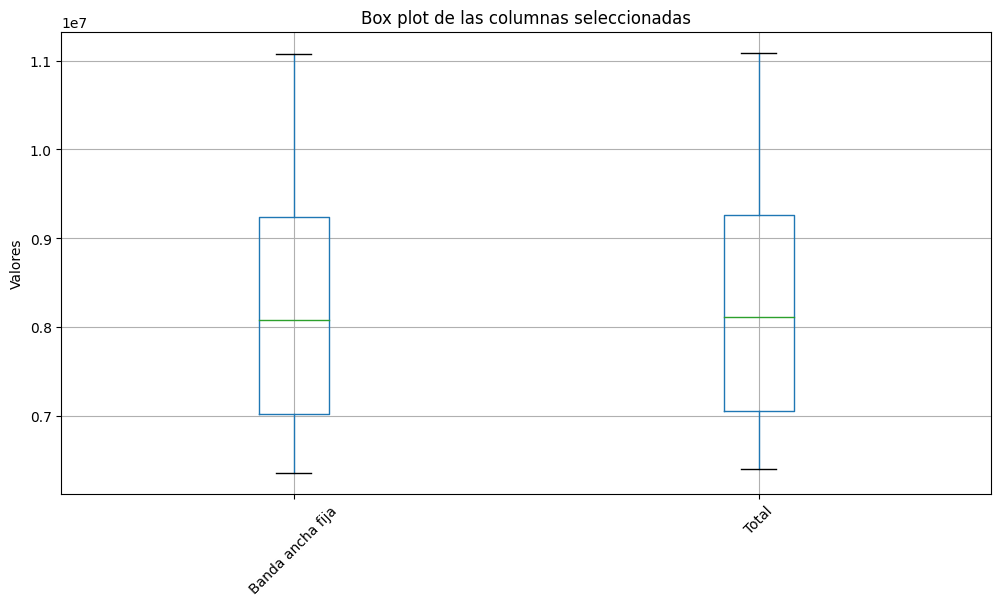

In [32]:
columnas_seleccionadas = ['Banda ancha fija', 'Total']

# Gráfico de caja para visualizar outliers de las columnas seleccionadas
plt.figure(figsize=(12, 6))
df_internet_baf_total[columnas_seleccionadas].boxplot()
plt.title('Box plot de las columnas seleccionadas')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

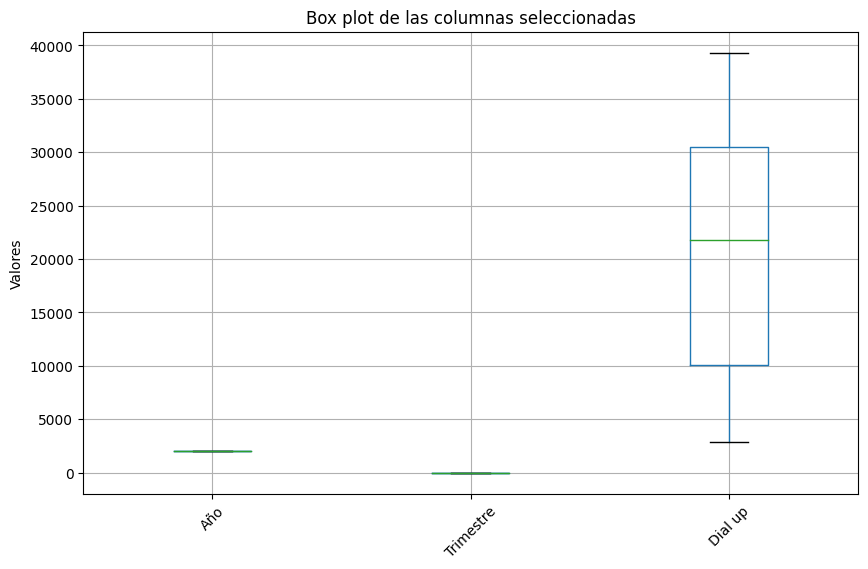

In [33]:
columnas_seleccionadas2 = ['Año', 'Trimestre', 'Dial up']

# Gráfico de caja para visualizar outliers de las columnas seleccionadas
plt.figure(figsize=(10, 6))
df_internet_baf_total[columnas_seleccionadas2].boxplot()
plt.title('Box plot de las columnas seleccionadas')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Tendencia Banda ancha fija por año

In [34]:
box = df_internet_baf_total.groupby('Año')['Banda ancha fija'].sum().reset_index()

<Axes: xlabel='Año'>

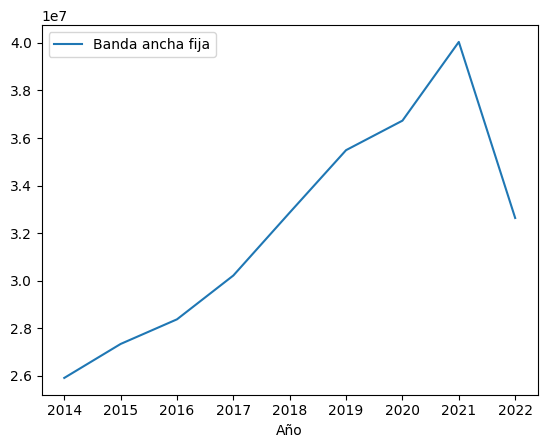

In [35]:
box.plot(kind = "line", x = "Año", y = "Banda ancha fija", alpha = 1)

### Tendencia Banda Corta

In [36]:
box2 = df_internet_baf_total.groupby('Año')['Dial up'].sum().reset_index()

<Axes: xlabel='Año'>

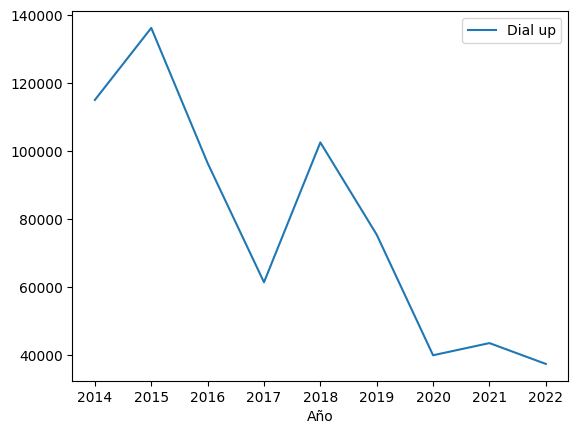

In [37]:
box2.plot(kind = "line", x = "Año", y = "Dial up", alpha = 1)

# Conclusión

## Se puede apreciar claramente cómo en los últimos 8 años ha ido cambiando el servicio brindado a los usuarios. Se ha empleado mucho más la banda ancha fija, la cual presta un servicio de alta velocidad, en contraste con el antiguo Dial up, que ha mermado notoriamente su empleo.

## Analisis Exploratorio: Historico velocidad Internet


In [38]:
df_historico_velocidad_prov = pd.read_csv('Datasets_normalizados\historico_velocidad_internet (2).csv')

In [39]:
df_historico_velocidad_prov.shape

(840, 4)

In [40]:
df_historico_velocidad_prov.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,3,Buenos Aires,70
1,2022,3,Capital Federal,101
2,2022,3,Catamarca,61
3,2022,3,Chaco,53
4,2022,3,Chubut,16


In [41]:
df_historico_velocidad_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     840 non-null    int64 
 1   Trimestre               840 non-null    int64 
 2   Provincia               840 non-null    object
 3   Mbps (Media de bajada)  840 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 26.4+ KB


In [42]:
#Contabilizamos valores nulos
df_historico_velocidad_prov.isnull().sum()

Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64

In [43]:
#Contabilizamos valores duplicados
df_historico_velocidad_prov.duplicated().sum()

0

In [44]:
df_historico_velocidad_prov.describe()

,Año,Trimestre,Mbps (Media de bajada)
count,840.000000,840.000000,840.000000
mean,2017.885714,2.457143,13.841667
std,2.528745,1.105009,14.669499
min,2014.000000,1.000000,3.000000
25%,2016.000000,1.000000,4.000000
50%,2018.000000,2.000000,7.000000
75%,2020.000000,3.000000,18.000000
max,2022.000000,4.000000,101.000000


### Identificamos la distribución de los datos y outliers

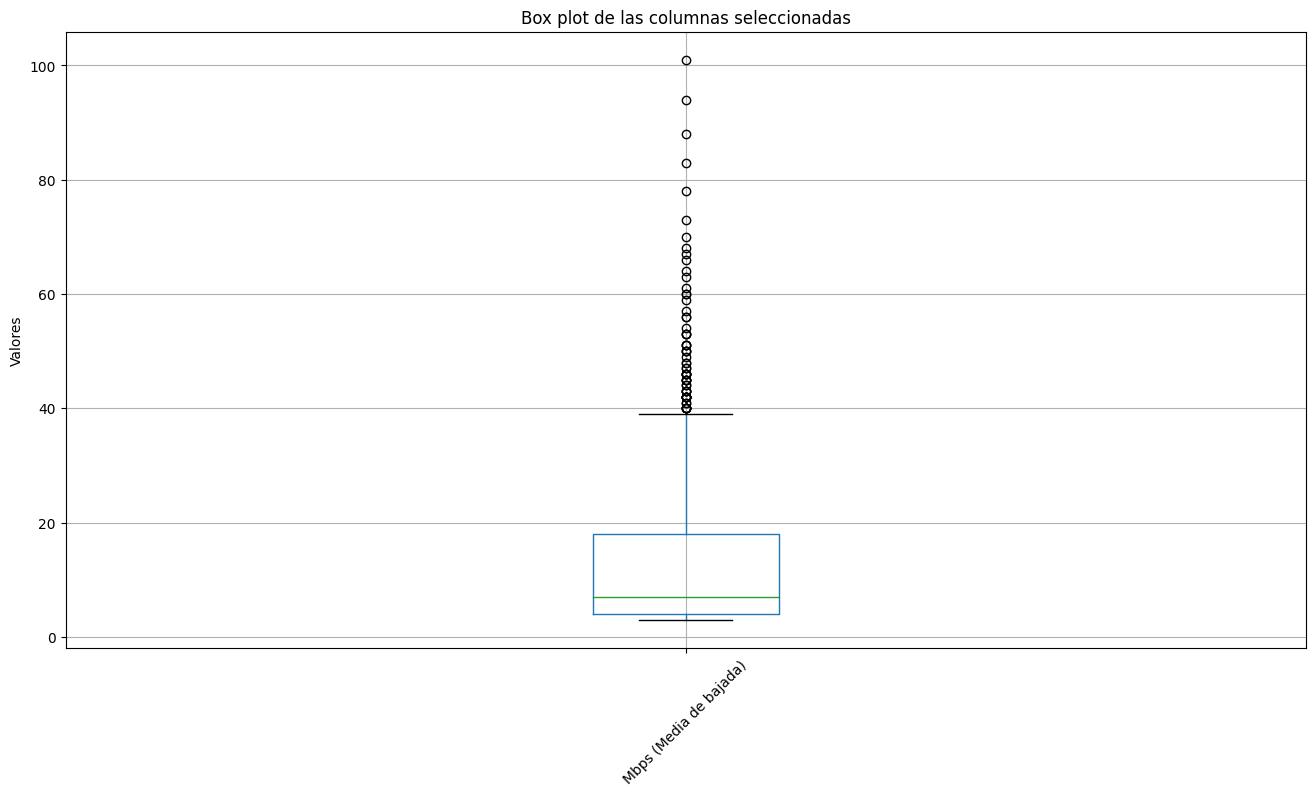

In [45]:
columnas_seleccionadas3 = ['Mbps (Media de bajada)']

# Gráfico de caja para visualizar outliers de las columnas seleccionadas
plt.figure(figsize=(16, 8))
df_historico_velocidad_prov[columnas_seleccionadas3].boxplot()
plt.title('Box plot de las columnas seleccionadas')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Distribución y outliers en las velocidades promedio por año

In [46]:
velocidad_promedio_por_año = df_historico_velocidad_prov.groupby('Año')['Mbps (Media de bajada)'].mean().reset_index()

In [47]:
velocidad_promedio_por_año

,Año,Mbps (Media de bajada)
0,2014,3.364583
1,2015,4.125000
2,2016,4.770833
3,2017,6.270833
4,2018,9.729167
5,2019,14.031250
6,2020,22.218750
7,2021,28.718750
8,2022,37.180556


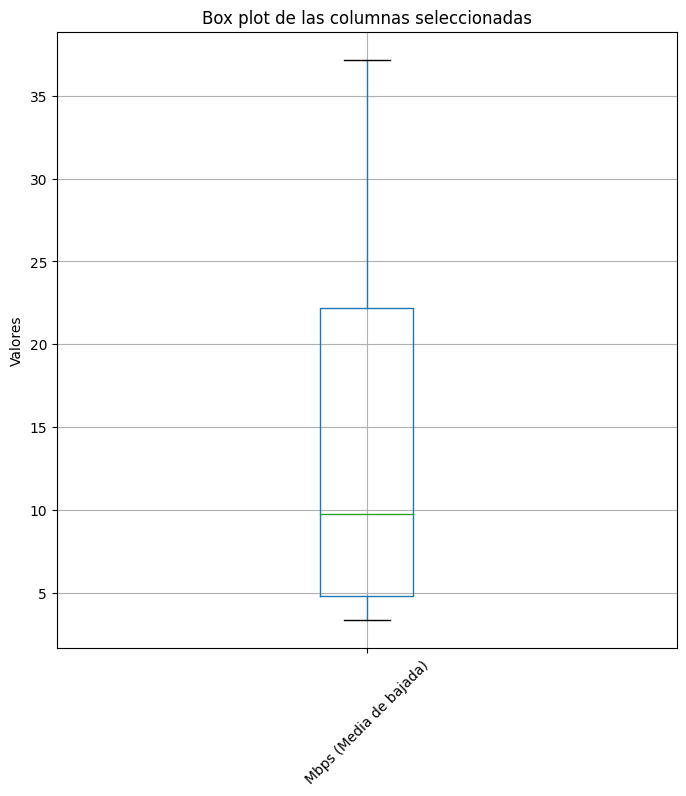

In [48]:
columnas = ['Mbps (Media de bajada)']

# Gráfico de caja para visualizar outliers de las columnas seleccionadas
plt.figure(figsize=(8, 8))
velocidad_promedio_por_año[columnas].boxplot()
plt.title('Box plot de las columnas seleccionadas')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Identificamos provincias con mejores velocidades promedio de internet en el pais

In [49]:
prov_historico = df_historico_velocidad_prov.groupby('Provincia')['Mbps (Media de bajada)'].mean().sort_values(ascending=False)

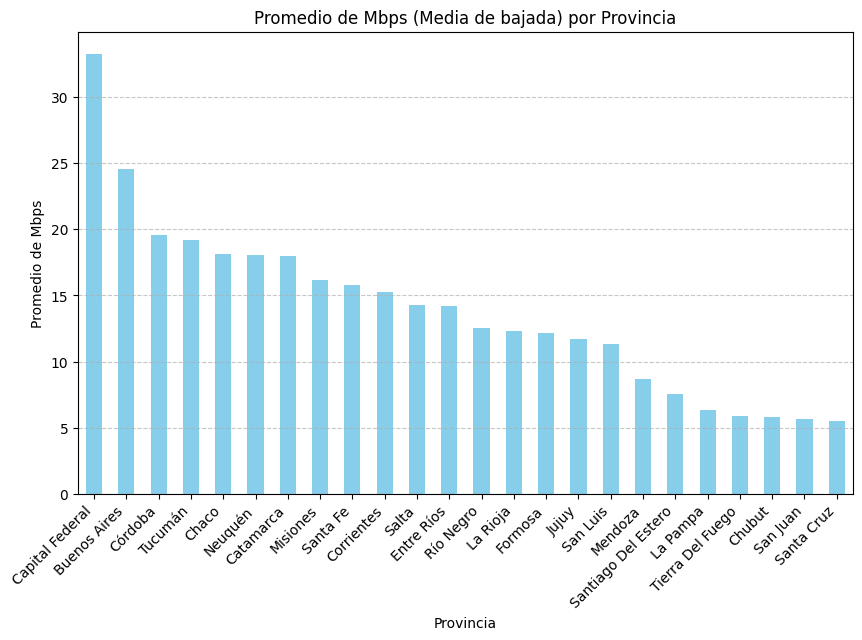

In [50]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
prov_historico.plot(kind='bar', color='skyblue')
plt.title('Promedio de Mbps (Media de bajada) por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Promedio de Mbps')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.show()

## Graficamos el cambio en la velocidad de internet brindada a lo largo del país separado en regiones, a través del tiempo  

In [51]:
#Creamos una columna que contemple los trimestres con sus correspondientes años
df_historico_velocidad_prov['year_trim'] = df_historico_velocidad_prov.apply(lambda x: f'{x.Año - 2000}_{x.Trimestre}', axis=1)

## Buenos Aires y Capital Federal

d:\Artemio\Proyectos\Proyecto data analyst\env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


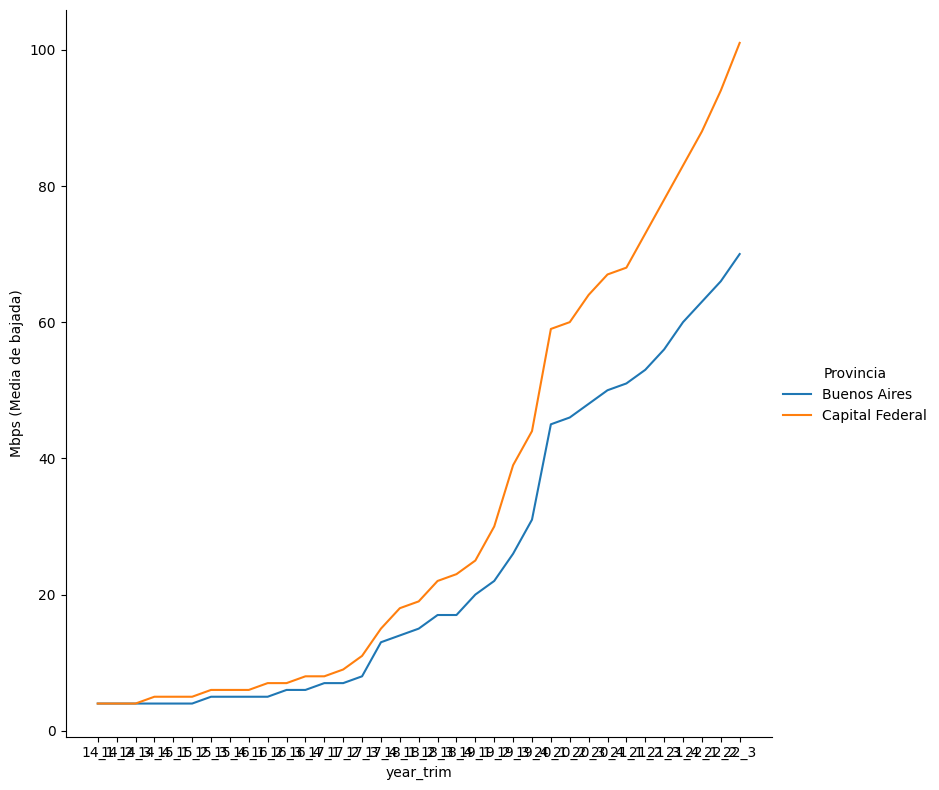

In [123]:
# Lista de provincias que quieres incluir en el gráfico
buenos_aires = ['Buenos Aires', 'Capital Federal']

# Filtrar el DataFrame para incluir solo las provincias deseadas
df_filtered = df_historico_velocidad_prov.query("Provincia in @buenos_aires")

# Ordenar el DataFrame según 'Año' y 'Trimestre'
df_filtered = df_filtered.sort_values(by=['Año', 'Trimestre'])

# Trazar el gráfico utilizando sns.relplot
sns.relplot(data=df_filtered, x='year_trim', y='Mbps (Media de bajada)', hue='Provincia', height=8, kind='line')

# Mostrar el gráfico
plt.show()

## Región Centro

d:\Artemio\Proyectos\Proyecto data analyst\env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


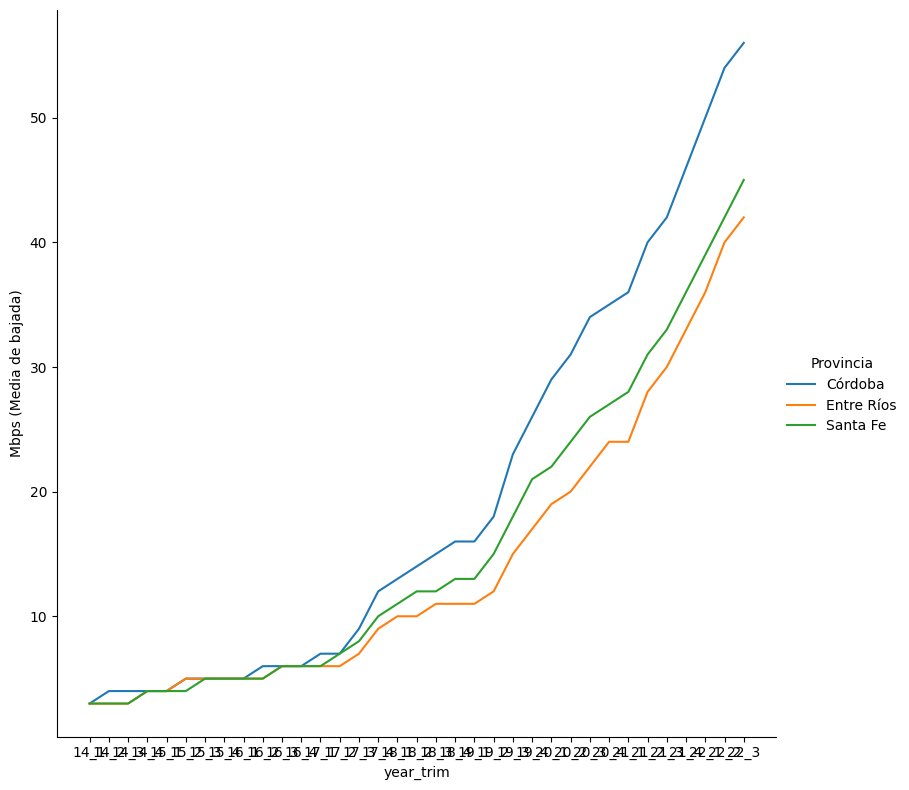

In [122]:
# Lista de provincias que quieres incluir en el gráfico
region_centro = ['Córdoba', 'Entre Ríos', 'Santa Fe']

# Filtrar el DataFrame para incluir solo las provincias deseadas
df_filtered = df_historico_velocidad_prov.query("Provincia in @region_centro")

# Ordenar el DataFrame según 'Año' y 'Trimestre'
df_filtered = df_filtered.sort_values(by=['Año', 'Trimestre'])

# Trazar el gráfico utilizando sns.relplot
sns.relplot(data=df_filtered, x='year_trim', y='Mbps (Media de bajada)', hue='Provincia', height=8, kind='line')

# Mostrar el gráfico
plt.show()

## Región del Norte grande Argentino

d:\Artemio\Proyectos\Proyecto data analyst\env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


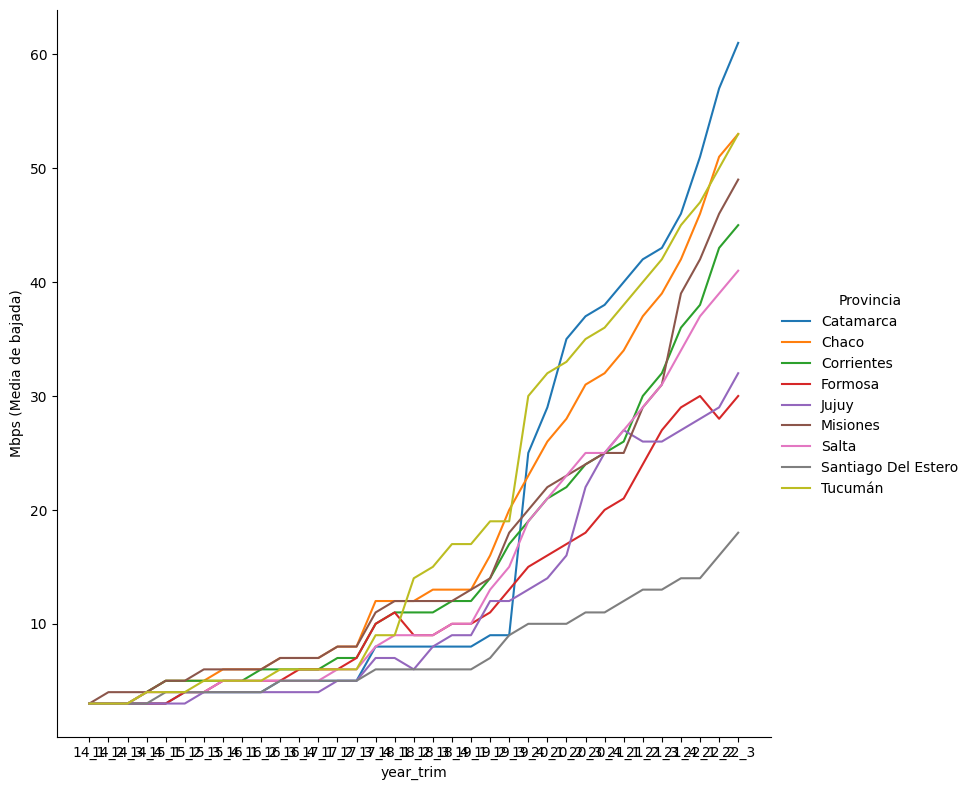

In [124]:
# Lista de provincias que quieres incluir en el gráfico
region_norte = ['Catamarca', 'Tucumán', 'Jujuy', 'Salta', 'Formosa', 'Chaco', 'Santiago Del Estero', 'Corrientes', 'Misiones']

# Filtrar el DataFrame para incluir solo las provincias deseadas
df_filtered = df_historico_velocidad_prov.query("Provincia in @region_norte")

# Ordenar el DataFrame según 'Año' y 'Trimestre'
df_filtered = df_filtered.sort_values(by=['Año', 'Trimestre'])

# Trazar el gráfico utilizando sns.relplot
sns.relplot(data=df_filtered, x='year_trim', y='Mbps (Media de bajada)', hue='Provincia', height=8, kind='line')

# Mostrar el gráfico
plt.show()

## Región Cuyo

d:\Artemio\Proyectos\Proyecto data analyst\env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


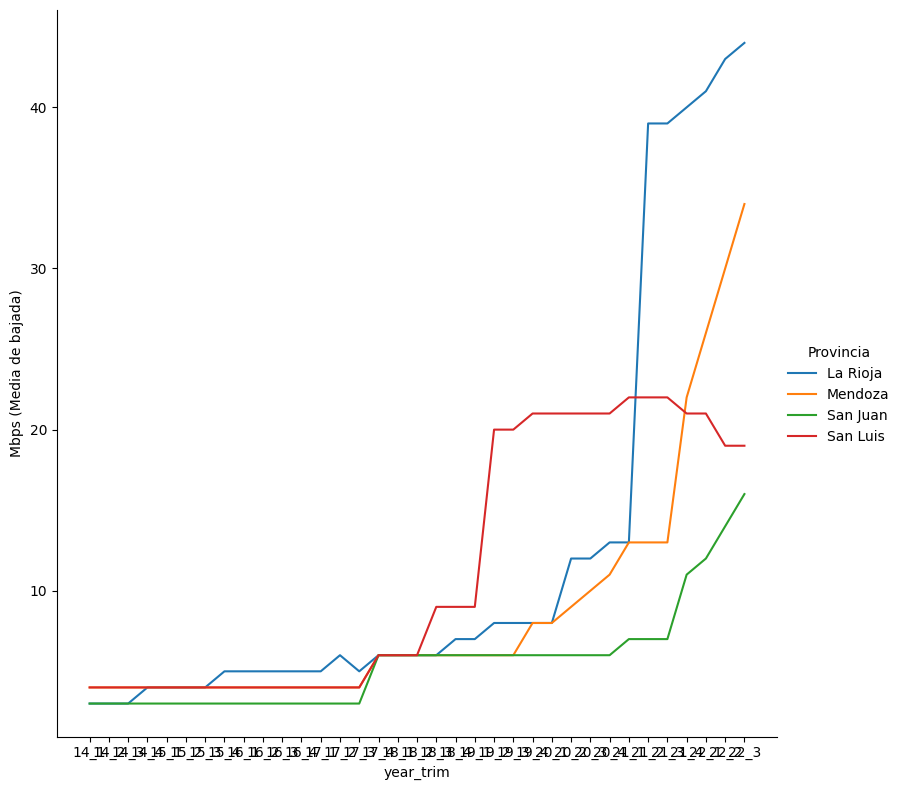

In [125]:
# Lista de provincias que quieres incluir en el gráfico
region_cuyo = ['San Juan', 'Mendoza', 'La Rioja', 'San Luis']

# Filtrar el DataFrame para incluir solo las provincias deseadas
df_filtered = df_historico_velocidad_prov.query("Provincia in @region_cuyo")

# Ordenar el DataFrame según 'Año' y 'Trimestre'
df_filtered = df_filtered.sort_values(by=['Año', 'Trimestre'])

# Trazar el gráfico utilizando sns.relplot
sns.relplot(data=df_filtered, x='year_trim', y='Mbps (Media de bajada)', hue='Provincia', height=8, kind='line')

# Mostrar el gráfico
plt.show()

## Región Patagónica

d:\Artemio\Proyectos\Proyecto data analyst\env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


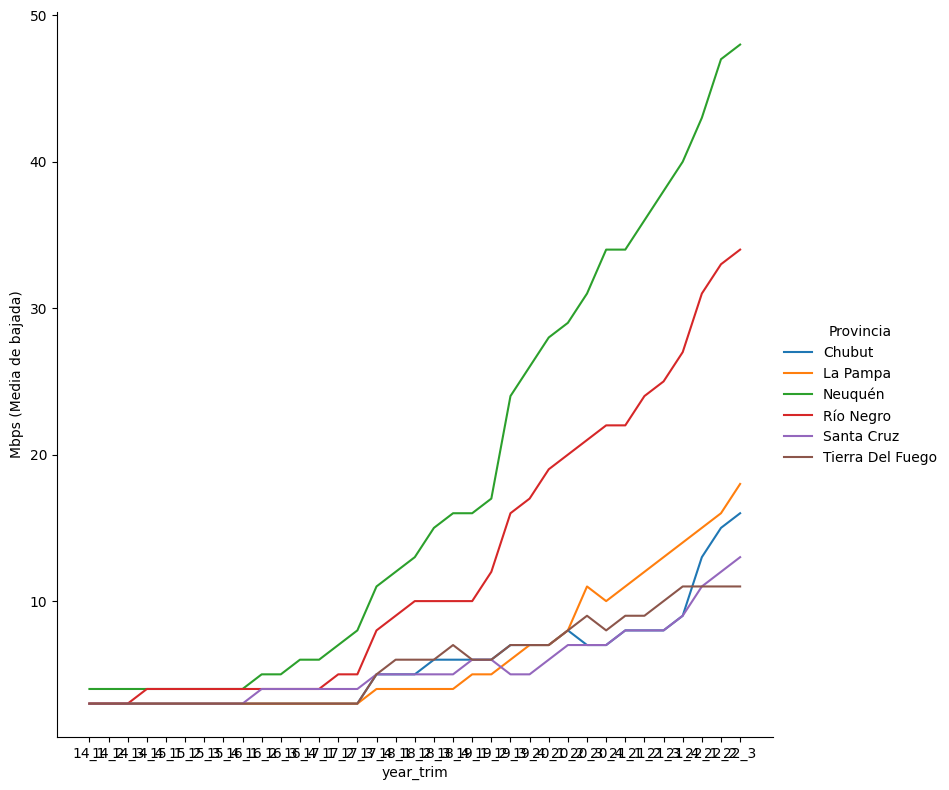

In [126]:
# Lista de provincias que quieres incluir en el gráfico
region_patagonica = ['La Pampa', 'Río Negro', 'Neuquén', 'Chubut', 'Santa Cruz', 'Tierra Del Fuego']

# Filtrar el DataFrame para incluir solo las provincias deseadas
df_filtered = df_historico_velocidad_prov.query("Provincia in @region_patagonica")

# Ordenar el DataFrame según 'Año' y 'Trimestre'
df_filtered = df_filtered.sort_values(by=['Año', 'Trimestre'])

# Trazar el gráfico utilizando sns.relplot
sns.relplot(data=df_filtered, x='year_trim', y='Mbps (Media de bajada)', hue='Provincia', height=8, kind='line')

# Mostrar el gráfico
plt.show()

# Conclusión 

## Es evidente que año tras año se ha incrementado la oferta de Mbps de Internet, lo que refleja una demanda constante en el país. No obstante, también es claro que existen algunas provincias que aún tienen un rezago en este aspecto y no han alcanzado niveles óptimos.

## Analisis Exploratorio: Acceso a Banda ancha y angosta por provincia

In [53]:
df_acc_banda_ancha_angosta_prov = pd.read_csv("Datasets_normalizados\Internet_Accesos-por-velocidad.csv")

In [54]:
df_acc_banda_ancha_angosta_prov.head(3)

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,29985,27709,290315,297915,267044,12419,3618689,65821.0,4721668
1,2022,3,Capital Federal,5170,5742,34371,67829,51946,28692,1253105,105477.0,1547679
2,2022,3,Catamarca,710,3840,3107,5389,5099,3737,50298,2208.0,70293


In [55]:
df_acc_banda_ancha_angosta_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  840 non-null    int64  
 1   Trimestre            840 non-null    int64  
 2   Provincia            840 non-null    object 
 3   HASTA 512 kbps       840 non-null    int64  
 4   + 512 Kbps - 1 Mbps  840 non-null    int64  
 5   + 1 Mbps - 6 Mbps    840 non-null    int64  
 6   + 6 Mbps - 10 Mbps   840 non-null    int64  
 7   + 10 Mbps - 20 Mbps  840 non-null    int64  
 8   + 20 Mbps - 30 Mbps  840 non-null    int64  
 9   + 30 Mbps            840 non-null    int64  
 10  OTROS                834 non-null    float64
 11  Total                840 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 78.9+ KB


In [56]:
#Identificamos si hay nulos
df_acc_banda_ancha_angosta_prov.isnull().sum()

Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64

In [57]:
#Todos los valores nulos se encuentran en la columna "OTROS"
df_acc_banda_ancha_angosta_prov[df_acc_banda_ancha_angosta_prov.isnull().any(axis=1)]

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
313,2019,2,Capital Federal,740,1027,281370,124087,239691,296155,475991,NaN,1418395
323,2019,2,La Rioja,90,110,39819,4297,4857,130,1298,NaN,50304
324,2019,2,Mendoza,200,2522,205165,2971,10092,1256,234,NaN,222260
331,2019,2,Santa Cruz,250,840,24861,3806,1202,280,4,NaN,30010
334,2019,2,Tierra Del Fuego,60,1230,41824,4241,1573,960,32,NaN,47895
335,2019,2,Tucumán,160,1570,78891,44296,24291,6280,18394,NaN,166673


In [58]:
#Contabilizamos la cantidad de valores duplicados
df_acc_banda_ancha_angosta_prov.duplicated().sum()

0

In [59]:
df_acc_banda_ancha_angosta_prov.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
count,840.000000,840.000000,840.000000,840.000000,8.400000e+02,840.000000,840.000000,840.000000,8.400000e+02,834.000000,8.400000e+02
mean,2017.885714,2.457143,2898.440476,10374.467857,1.509700e+05,33783.186905,34638.141667,19442.944048,7.917956e+04,4933.455635,3.439888e+05
std,2.528745,1.105009,10900.554628,21587.794231,3.481538e+05,60759.295096,87389.351535,70347.380887,3.426234e+05,12139.331302,7.373366e+05
min,2014.000000,1.000000,60.000000,0.000000,2.842000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1945.000000,1.240600e+04
25%,2016.000000,1.000000,320.000000,1347.000000,2.853925e+04,2967.750000,2039.500000,190.000000,7.000000e+00,0.000000,5.232825e+04
50%,2018.000000,2.000000,1050.000000,3760.500000,4.883450e+04,8303.500000,7766.000000,2214.500000,8.825000e+02,0.000000,1.043330e+05
75%,2020.000000,3.000000,2565.750000,8328.250000,8.689750e+04,29956.000000,24396.500000,9284.000000,1.966075e+04,5275.500000,1.775798e+05
max,2022.000000,4.000000,199768.000000,171244.000000,2.299705e+06,403575.000000,886678.000000,949093.000000,3.618689e+06,120464.000000,4.721668e+06


### Identificamos la distribución de los datos y outliers

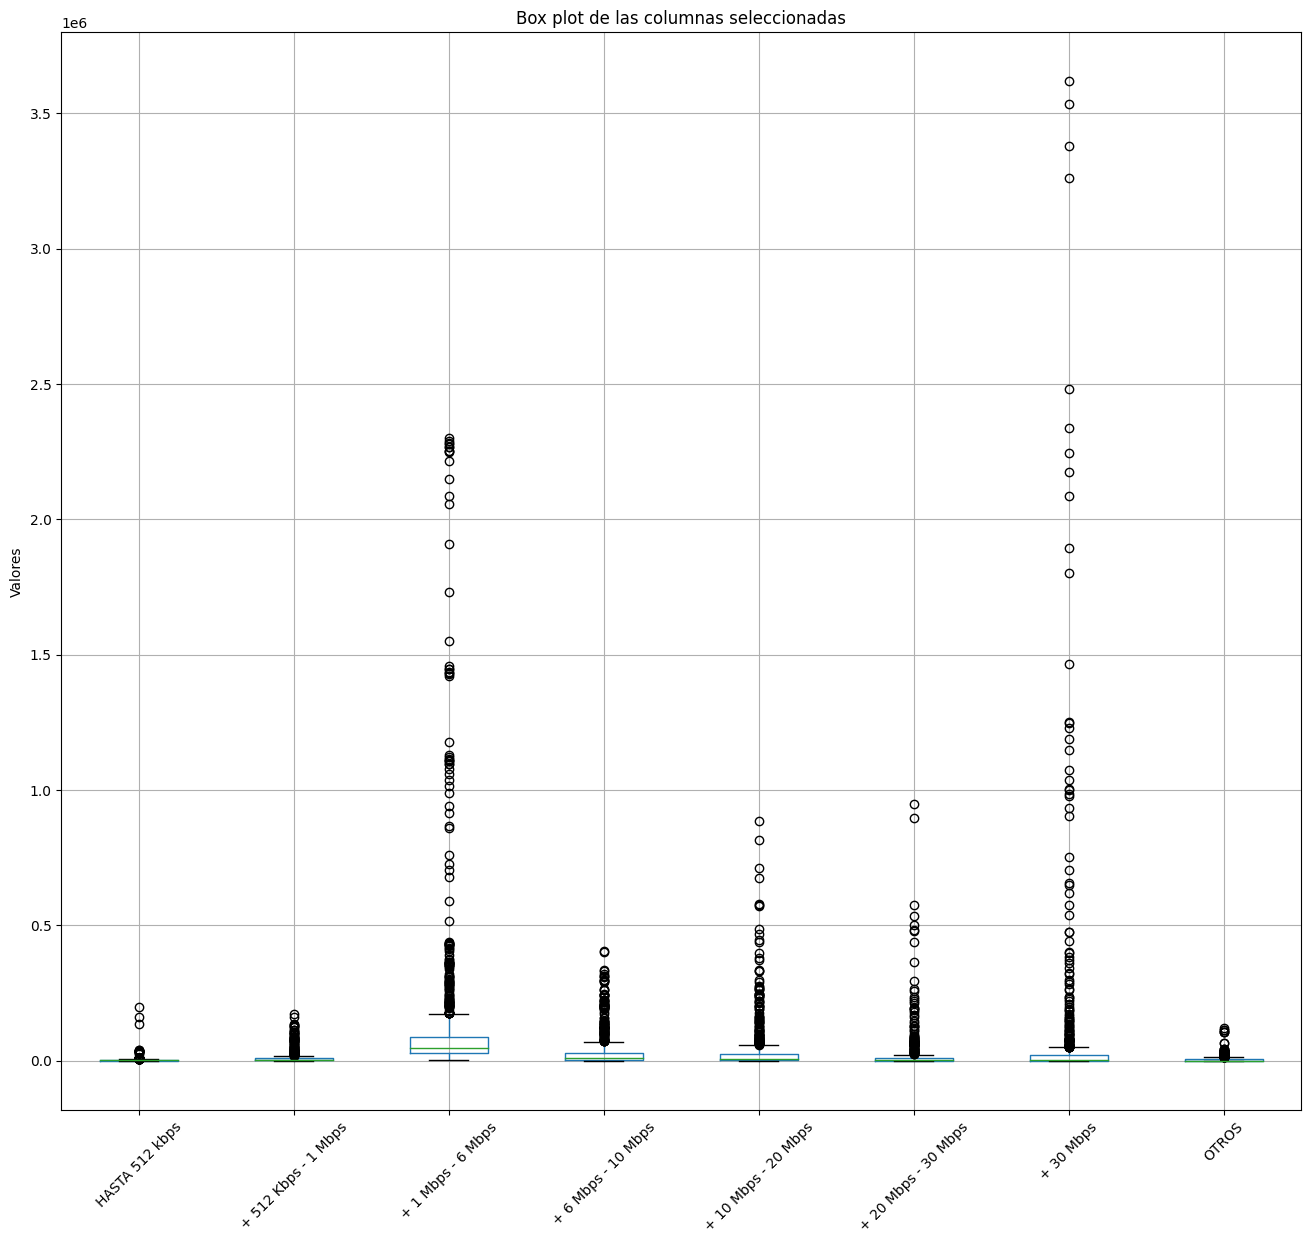

In [60]:
columnas_seleccionadas3 = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']

# Gráfico de caja para visualizar outliers de las columnas seleccionadas
plt.figure(figsize=(16, 14))
df_acc_banda_ancha_angosta_prov[columnas_seleccionadas3].boxplot()
plt.title('Box plot de las columnas seleccionadas')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Agrupamos las distintas velocidades por año, para identificar outliers y distribucion de los datos

In [61]:
df_subset_acc_banda_ancha_angosta_prov = df_acc_banda_ancha_angosta_prov.groupby("Año")[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']].sum().reset_index()

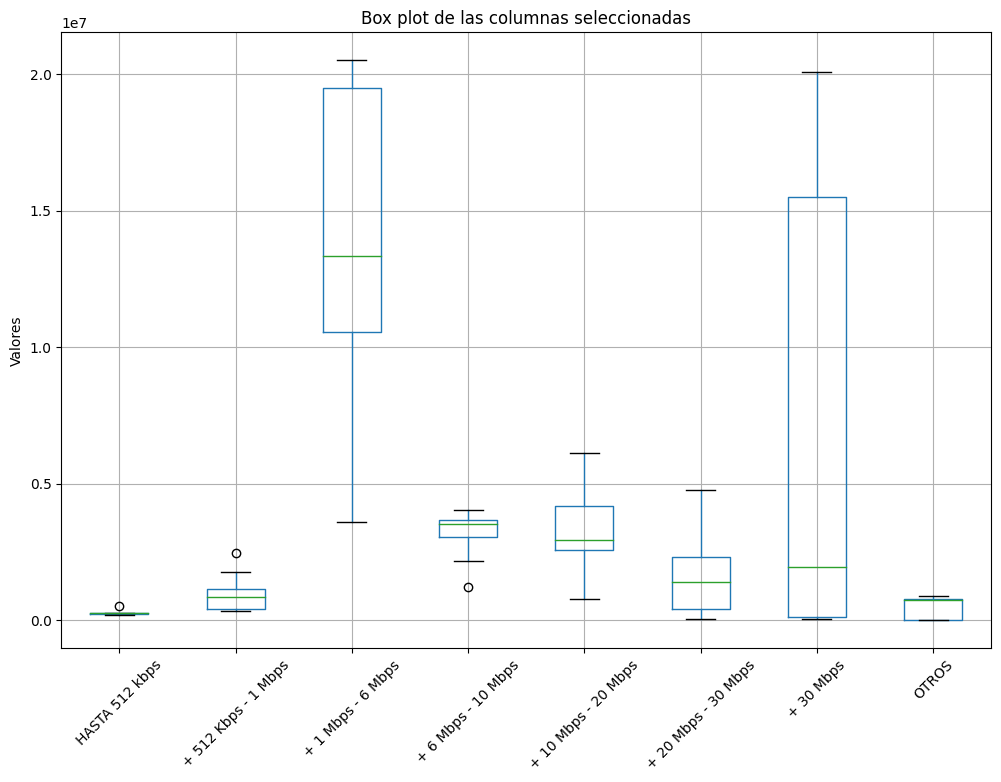

In [62]:
columnas_seleccionadas3 = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']

# Gráfico de caja para visualizar outliers de las columnas seleccionadas
plt.figure(figsize=(12, 8))
df_subset_acc_banda_ancha_angosta_prov[columnas_seleccionadas3].boxplot()
plt.title('Box plot de las columnas seleccionadas')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Evolución de las velocidades de conexión por año

In [63]:
df_acc_banda_ancha_angosta_prov.columns

Index(['Año', 'Trimestre', 'Provincia', 'HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total'],
      dtype='object')

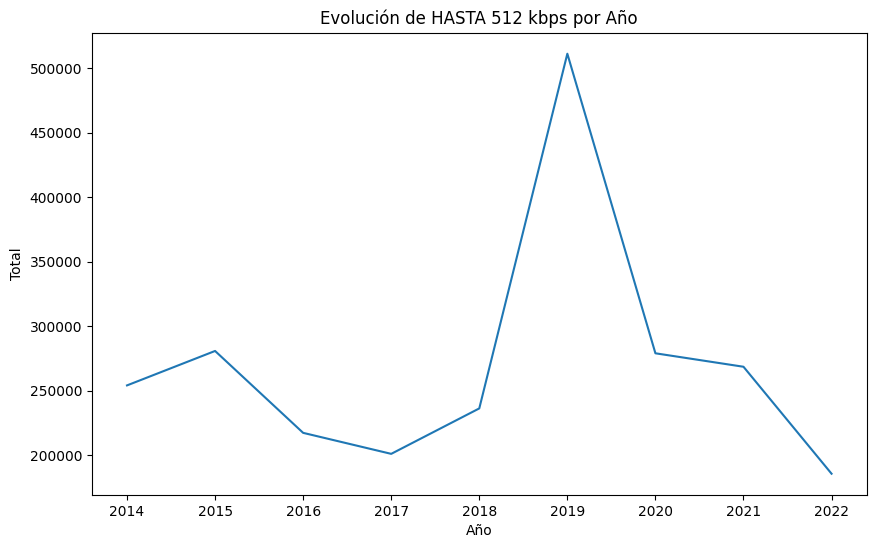

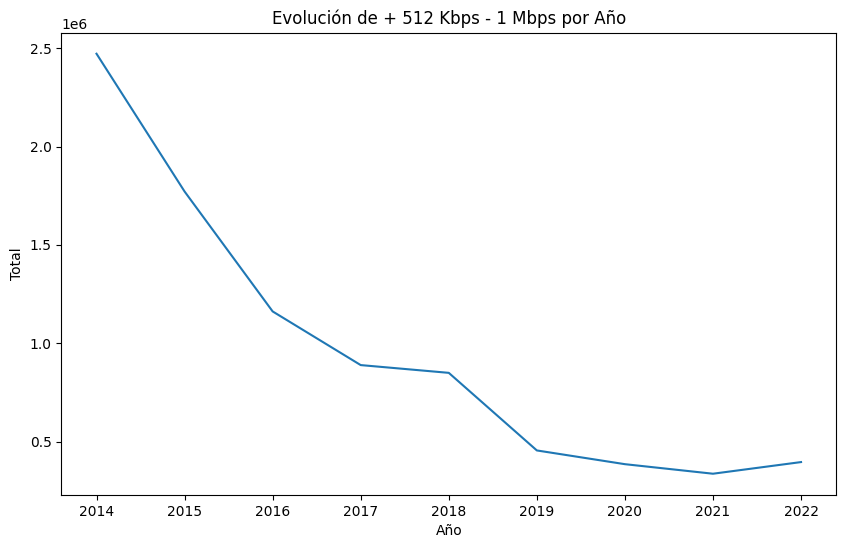

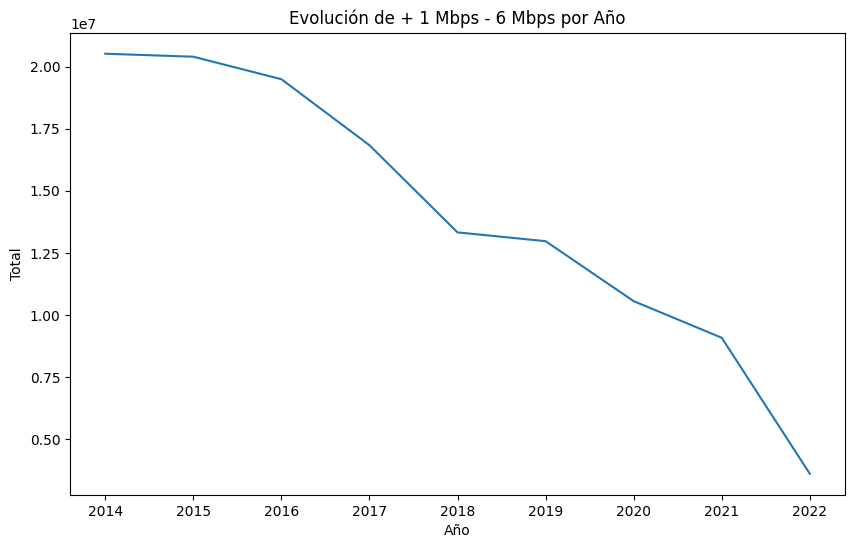

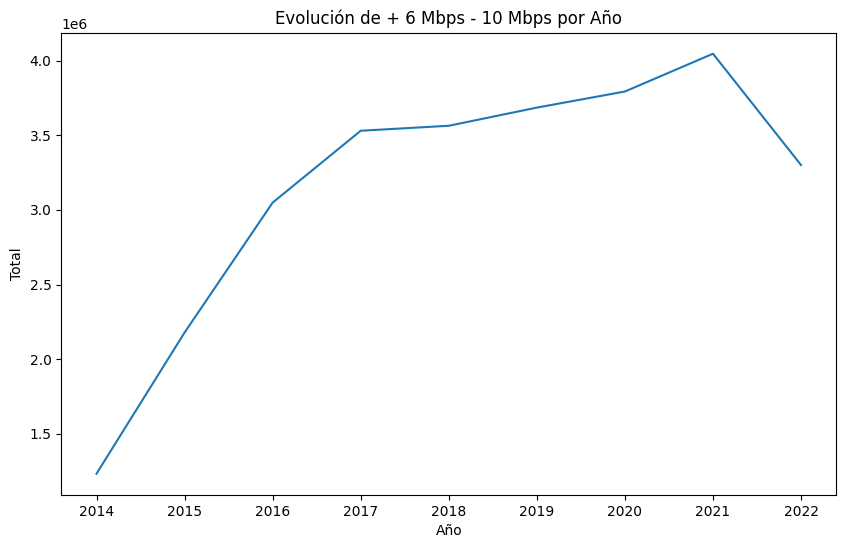

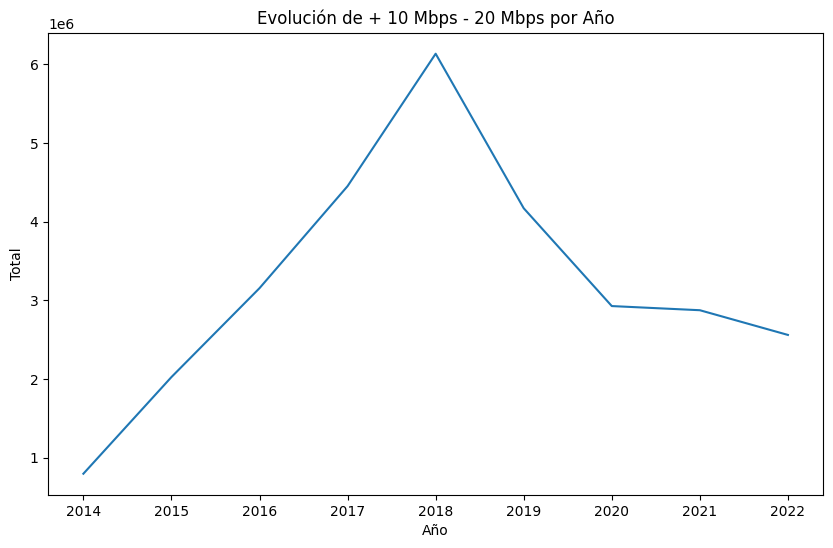

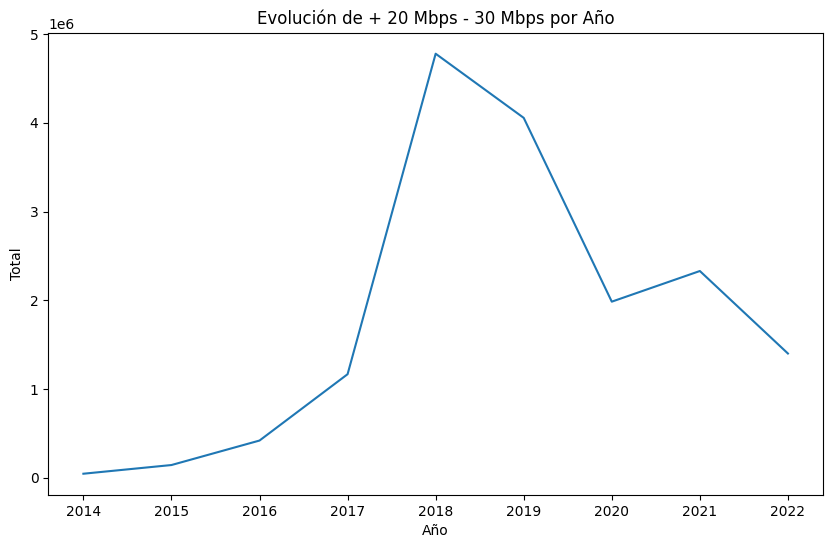

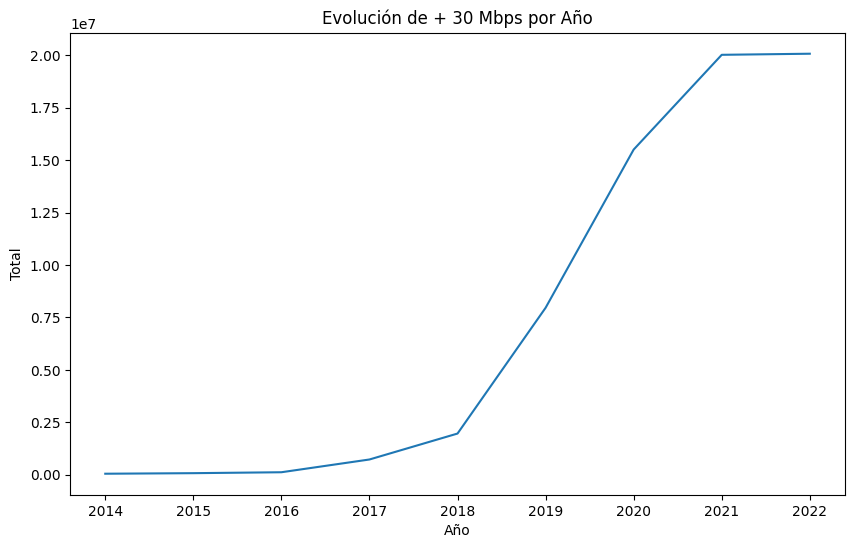

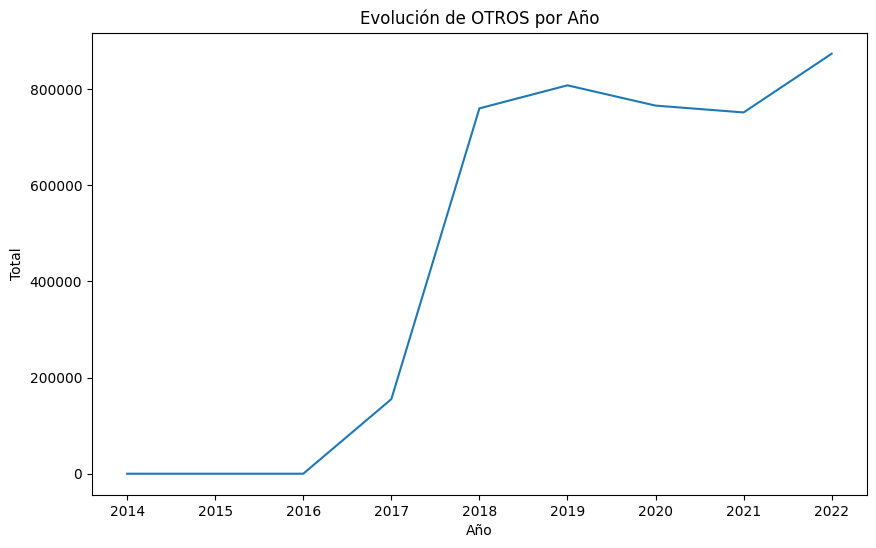

In [64]:
# Obtener la lista de columnas a graficar
columnas = ['HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']

# Totalizar los datos por Año
df_total = df_acc_banda_ancha_angosta_prov.groupby('Año').sum()

# Graficar cada columna por separado por Año
for columna in columnas:
    plt.figure(figsize=(10, 6))
    plt.plot(df_total.index, df_total[columna])
    plt.title(f'Evolución de {columna} por Año')
    plt.xlabel('Año')
    plt.ylabel('Total')
    plt.show()

# Conclusión:

# Se aprecia una mejora conciderable en el pasar de los años en las velocidades brindadas a los usuarios, que apuntan cada vez mas a los 30Mbps o mas, a la hora de consumir internet

## Analisis Exploratorio: Penetracion de Internet fijo (accesos por cada 100 hogares)

In [65]:
df_penetracion_int_fijo_100hog = pd.read_csv('Datasets\Internet_Penetracion-por-100-hog_hab.csv', decimal=',')

In [66]:
df_penetracion_int_fijo_100hog.head(3)

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,3,76.64,23.95,Jul-Sept 2022
1,2022,2,75.97,23.72,Abr-Jun 2022
2,2022,1,73.88,23.05,Ene-Mar 2022


In [67]:
df_penetracion_int_fijo_100hog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           35 non-null     int64  
 1   Trimestre                     35 non-null     int64  
 2   Accesos por cada 100 hogares  35 non-null     float64
 3   Accesos por cada 100 hab      35 non-null     float64
 4   Periodo                       35 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.5+ KB


In [68]:
#Identificamos si existen valores nulos
df_penetracion_int_fijo_100hog.isnull().sum()

Año                             0
Trimestre                       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
Periodo                         0
dtype: int64

In [69]:
df_penetracion_int_fijo_100hog.duplicated().sum()

0

In [70]:
df_penetracion_int_fijo_100hog.describe()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,35.000000,35.000000,35.000000,35.000000
mean,2017.885714,2.457143,60.275429,18.606286
std,2.564135,1.120474,8.148909,2.662968
min,2014.000000,1.000000,49.550000,15.050000
25%,2016.000000,1.500000,52.985000,16.245000
50%,2018.000000,2.000000,59.160000,18.240000
75%,2020.000000,3.000000,66.050000,20.475000
max,2022.000000,4.000000,76.640000,23.950000


### Identificamos la distribución de los datos y outliers

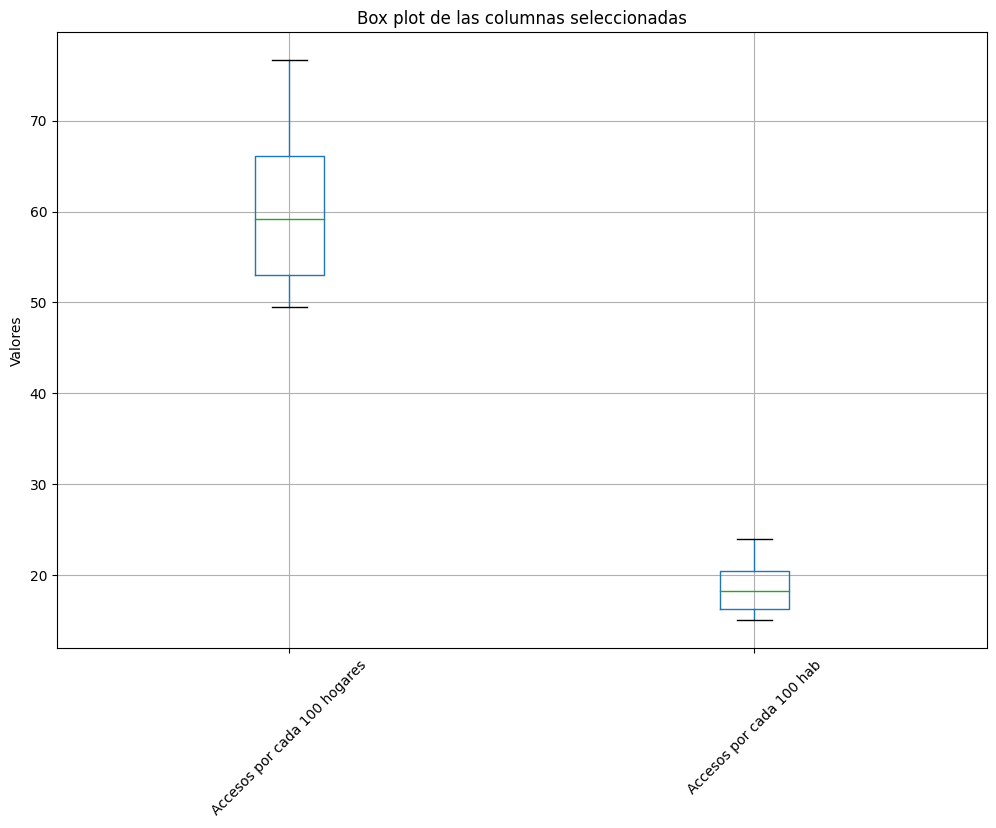

In [71]:
columnas_seleccionadas4 = ['Accesos por cada 100 hogares','Accesos por cada 100 hab']

# Gráfico de caja para visualizar outliers de las columnas seleccionadas
plt.figure(figsize=(12, 8))
df_penetracion_int_fijo_100hog[columnas_seleccionadas4].boxplot()
plt.title('Box plot de las columnas seleccionadas')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [72]:
# df_penetracion_int_fijo_100hog['year_trim'] = df_penetracion_int_fijo_100hog.apply(lambda x: f'{x.Año - 2000}_{x.Trimestre}', axis=1)

In [73]:
df_penetracion_int_fijo_100hog.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,3,76.64,23.95,Jul-Sept 2022
1,2022,2,75.97,23.72,Abr-Jun 2022
2,2022,1,73.88,23.05,Ene-Mar 2022
3,2021,4,73.18,22.81,Oct-Dic 2021
4,2021,3,70.58,21.98,Jul-Sept 2021


### Graficamos las variaciones de la variable Accesos por cada 100 hab y 100 hogares de acuerdo al Año

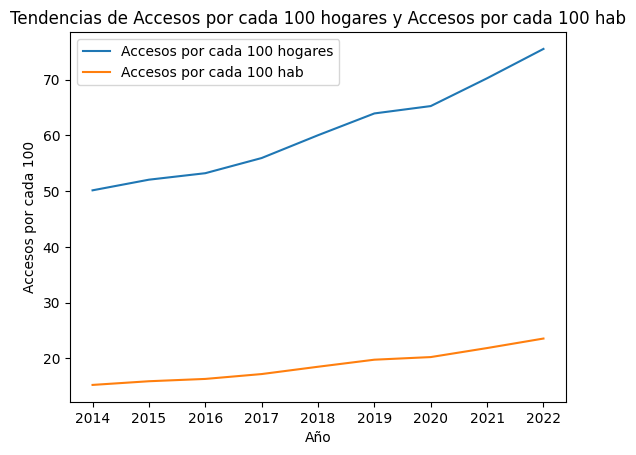

In [74]:
# Creamos un dataframe agrupado por Año y calcular el promedio de Accesos por cada 100 hogares y Accesos por cada 100 hab
df_grouped = df_penetracion_int_fijo_100hog.groupby('Año')[['Accesos por cada 100 hogares', 'Accesos por cada 100 hab']].mean()

# Graficamos
plt.plot(df_grouped.index, df_grouped['Accesos por cada 100 hogares'], label='Accesos por cada 100 hogares')
plt.plot(df_grouped.index, df_grouped['Accesos por cada 100 hab'], label='Accesos por cada 100 hab')

# Seteamos el gráfico
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100')
plt.title('Tendencias de Accesos por cada 100 hogares y Accesos por cada 100 hab')
plt.legend()

plt.show()

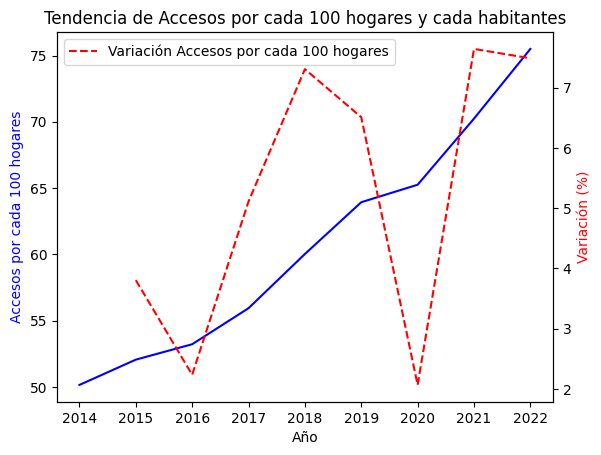

In [75]:
# Agrupamos por Año y calculamos la media de Accesos por cada 100 hogares y Accesos por cada 100 hab
df_grouped = df_penetracion_int_fijo_100hog.groupby('Año')[['Accesos por cada 100 hogares', 'Accesos por cada 100 hab']].mean()

# Calculo del porcentaje de variación respecto al Año anterior para cada columna
df_grouped['Variación Accesos por cada 100 hogares'] = df_grouped['Accesos por cada 100 hogares'].pct_change() * 100
df_grouped['Variación Accesos por cada 100 hab'] = df_grouped['Accesos por cada 100 hab'].pct_change() * 100

# Crear el gráfico
fig, ax1 = plt.subplots()

# Graficmos
ax1.plot(df_grouped.index, df_grouped['Accesos por cada 100 hogares'], 'b-', label='Accesos por cada 100 hogares')
ax1.set_xlabel('Año')
ax1.set_ylabel('Accesos por cada 100 hogares', color='b')

# Segunda escala para los porcentajes de variación
ax2 = ax1.twinx()

# Graficamos los porcentajes de variación
ax2.plot(df_grouped.index, df_grouped['Variación Accesos por cada 100 hogares'], 'r--', label='Variación Accesos por cada 100 hogares')
ax2.set_ylabel('Variación (%)', color='r')

# terminamos de setear
plt.title('Tendencia de Accesos por cada 100 hogares y cada habitantes')
plt.legend(loc='upper left')

# Mostrar el gráfico
plt.show()

# Conclusión

# A lo largo de los últimos años, Argentina ha experimentado un notorio y sostenido crecimiento en el acceso a internet, consolidándose como un país con una infraestructura madura y una demanda creciente por las mejores tecnologías de comunicación.

## Analisis Exploratorio: Penetracion de internet fijo (accesos cada 100 hogares por provincia)

In [76]:
df_hog_x_prov = pd.read_csv('Datasets\Internet_Penetracion-por-100-hog-provincia.csv', decimal=',')

In [77]:
df_hog_x_prov.head(3)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,78.11
1,2022,3,Capital Federal,122.28
2,2022,3,Catamarca,65.33


In [78]:
df_hog_x_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           840 non-null    int64  
 1   Trimestre                     840 non-null    int64  
 2   Provincia                     840 non-null    object 
 3   Accesos por cada 100 hogares  840 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 26.4+ KB


In [79]:
#Contabilizamos valores nulos
df_hog_x_prov.isnull().sum()

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

In [80]:
#Contabilizamos valores duplicados
df_hog_x_prov.duplicated().sum()

0

### Identificamos la distribución de los datos y outliers

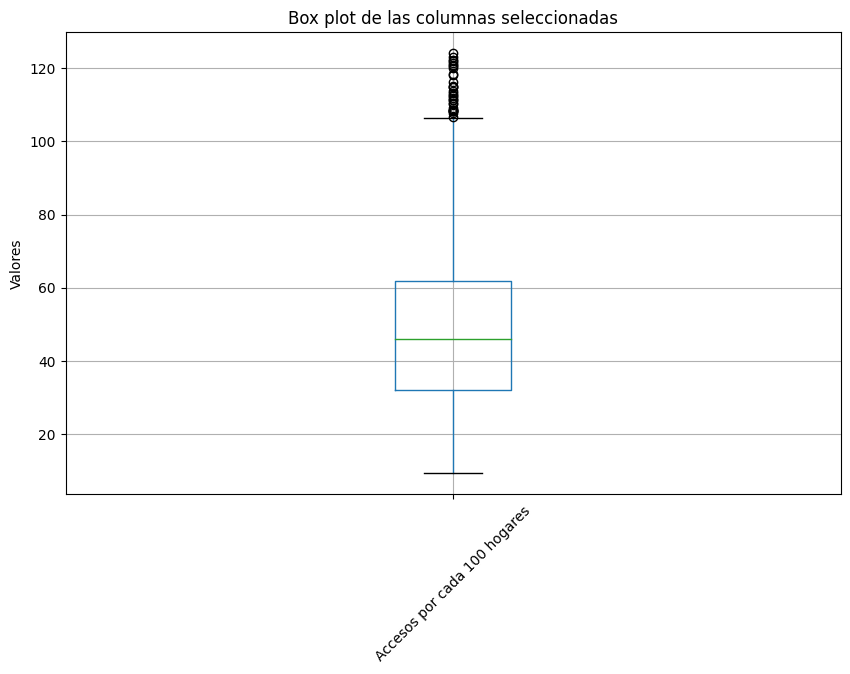

In [81]:
columnas_acces_hogar = ['Accesos por cada 100 hogares']

# Gráfico de caja para visualizar outliers de las columnas seleccionadas
plt.figure(figsize=(10, 6))
df_hog_x_prov[columnas_acces_hogar].boxplot()
plt.title('Box plot de las columnas seleccionadas')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [83]:
df_hog_x_prov.describe()

,Año,Trimestre,Accesos por cada 100 hogares
count,840.000000,840.000000,840.000000
mean,2017.885714,2.457143,49.065750
std,2.528745,1.105009,23.151885
min,2014.000000,1.000000,9.350000
25%,2016.000000,1.000000,32.107500
50%,2018.000000,2.000000,45.900000
75%,2020.000000,3.000000,61.865000
max,2022.000000,4.000000,124.060000


# Teniendo en cuenta las distintas regiones del pais, graficamos la variable Accesos por cada 100 hogares, contemplando el año y el trimestre

In [ ]:
#Creamos una nueva columna que unifique el año y el trimestre
df_hog_x_prov['year_trim'] = df_hog_x_prov.apply(lambda x: f'{x.Año - 2000}_{x.Trimestre}', axis=1)

## Buenos Aires y Capital federal

d:\Artemio\Proyectos\Proyecto data analyst\env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


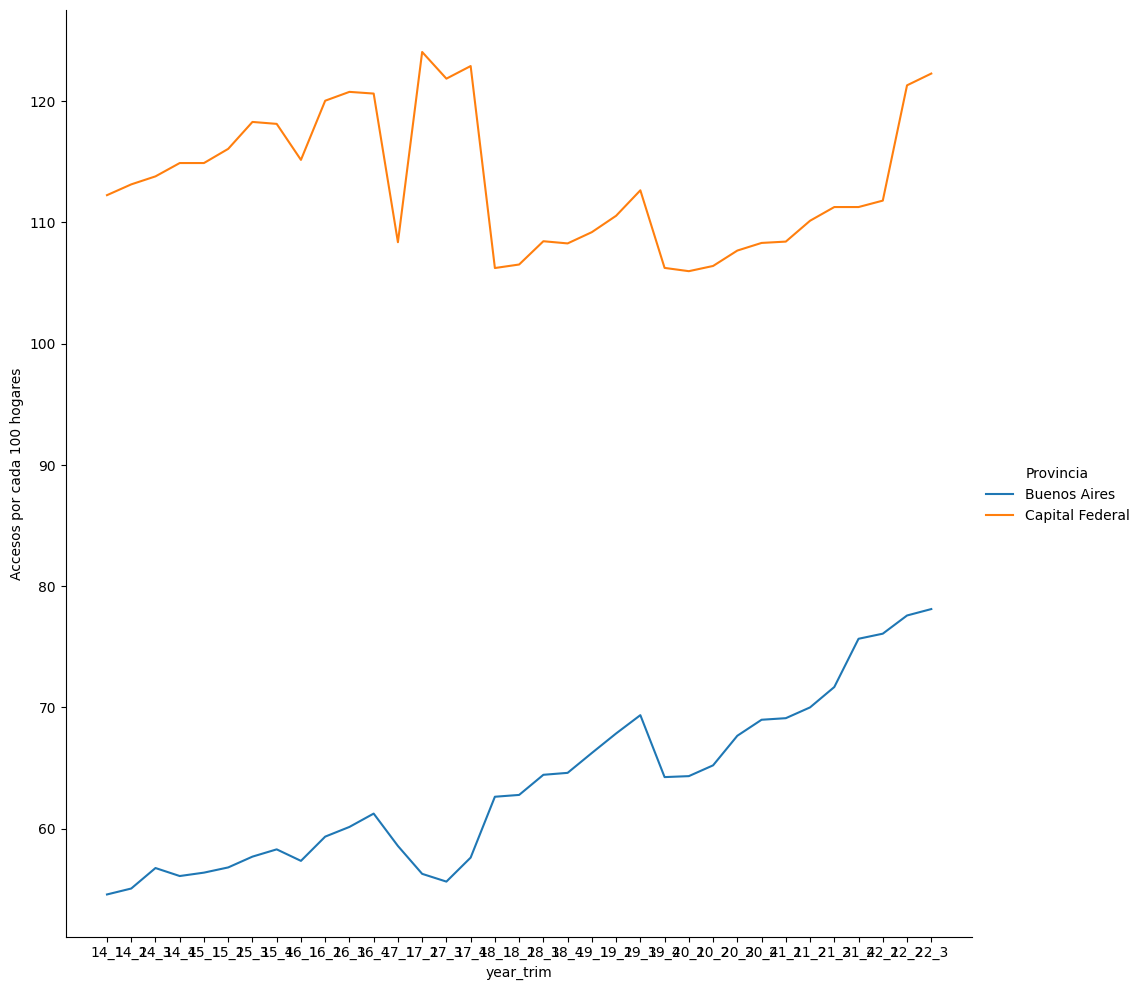

In [84]:
# Lista de provincias que quieres incluir en el gráfico
buenos_aires = ['Buenos Aires', 'Capital Federal']

# Filtrar el DataFrame para incluir solo las provincias deseadas
df_filtered = df_hog_x_prov.query("Provincia in @buenos_aires")

# Ordenar el DataFrame según 'Año' y 'Trimestre'
df_filtered = df_filtered.sort_values(by=['Año', 'Trimestre'])

# Trazar el gráfico utilizando sns.relplot
sns.relplot(data=df_filtered, x='year_trim', y='Accesos por cada 100 hogares', hue='Provincia', height=10, kind='line')

# Mostrar el gráfico
plt.show()

# Región Centro 

d:\Artemio\Proyectos\Proyecto data analyst\env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


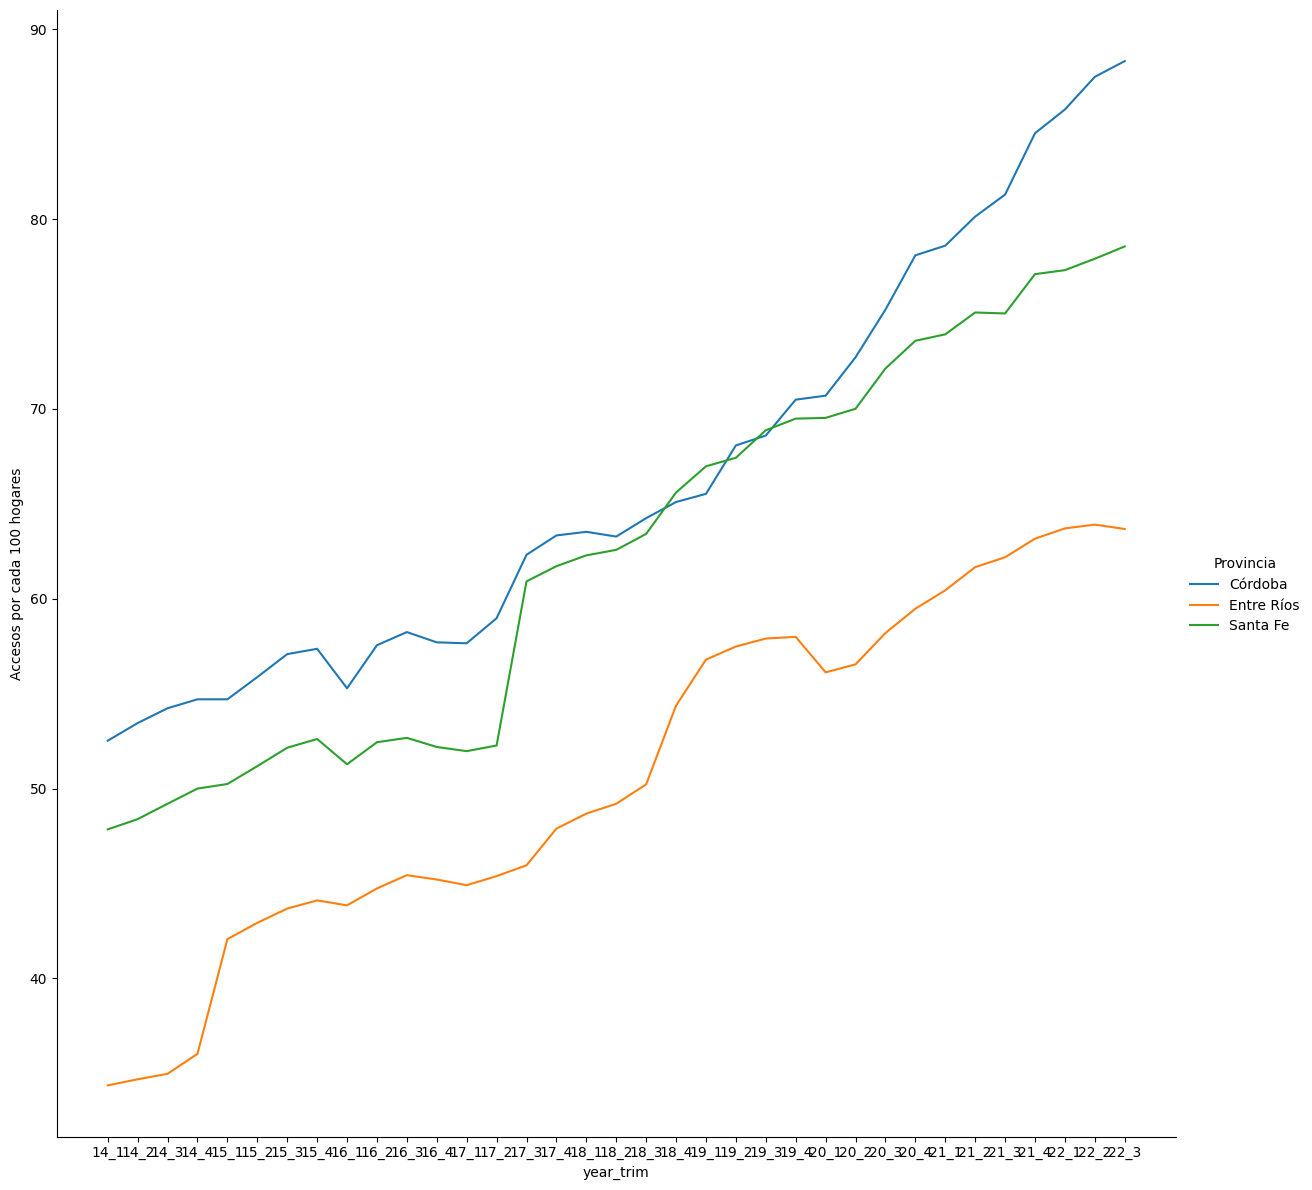

In [85]:
# Lista de provincias que quieres incluir en el gráfico
region_centro = ['Córdoba', 'Entre Ríos', 'Santa Fe']

# Filtrar el DataFrame para incluir solo las provincias deseadas
df_filtered = df_hog_x_prov.query("Provincia in @region_centro")

# Ordenar el DataFrame según 'Año' y 'Trimestre'
df_filtered = df_filtered.sort_values(by=['Año', 'Trimestre'])

# Trazar el gráfico utilizando sns.relplot
sns.relplot(data=df_filtered, x='year_trim', y='Accesos por cada 100 hogares', hue='Provincia', height=12, kind='line')

# Mostrar el gráfico
plt.show()

# Región del Norte grande Argentino

d:\Artemio\Proyectos\Proyecto data analyst\env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


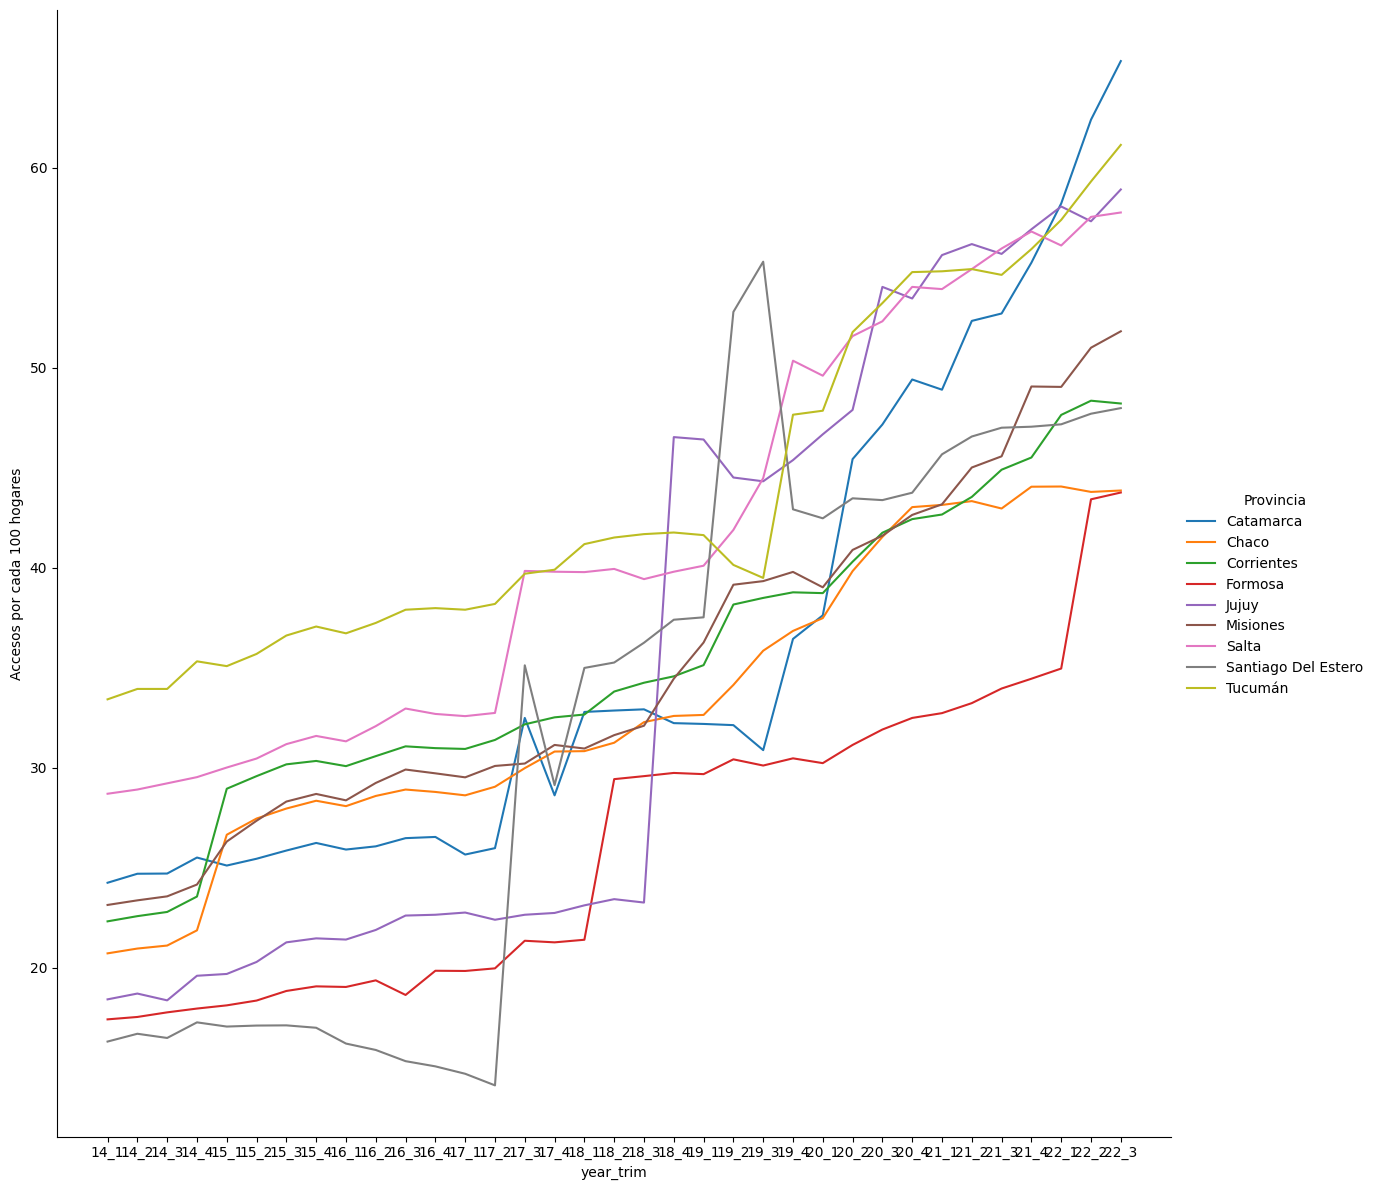

In [86]:
# Lista de provincias que quieres incluir en el gráfico
region_norte = ['Catamarca', 'Tucumán', 'Jujuy', 'Salta', 'Formosa', 'Chaco', 'Santiago Del Estero', 'Corrientes', 'Misiones']

# Filtrar el DataFrame para incluir solo las provincias deseadas
df_filtered = df_hog_x_prov.query("Provincia in @region_norte")

# Ordenar el DataFrame según 'Año' y 'Trimestre'
df_filtered = df_filtered.sort_values(by=['Año', 'Trimestre'])

# Trazar el gráfico utilizando sns.relplot
sns.relplot(data=df_filtered, x='year_trim', y='Accesos por cada 100 hogares', hue='Provincia', height=12, kind='line')

# Mostrar el gráfico
plt.show()

# Región Cuyo

d:\Artemio\Proyectos\Proyecto data analyst\env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


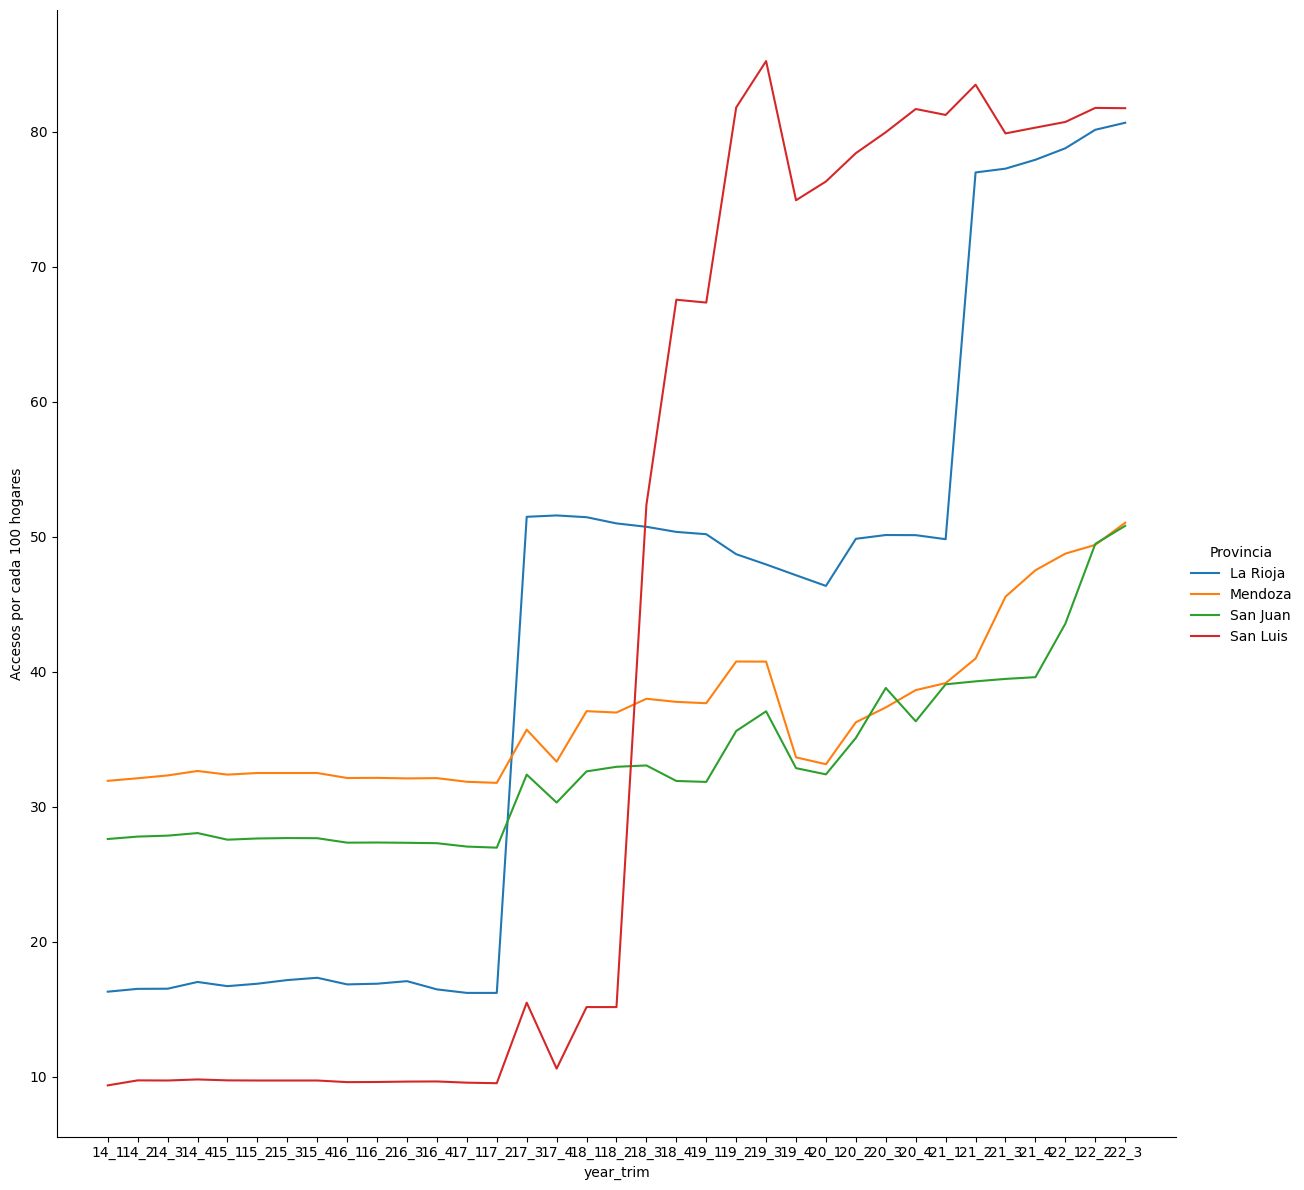

In [87]:
# Lista de provincias que quieres incluir en el gráfico
region_cuyo = ['San Juan', 'Mendoza', 'La Rioja', 'San Luis']

# Filtrar el DataFrame para incluir solo las provincias deseadas
df_filtered = df_hog_x_prov.query("Provincia in @region_cuyo")

# Ordenar el DataFrame según 'Año' y 'Trimestre'
df_filtered = df_filtered.sort_values(by=['Año', 'Trimestre'])

# Trazar el gráfico utilizando sns.relplot
sns.relplot(data=df_filtered, x='year_trim', y='Accesos por cada 100 hogares', hue='Provincia', height=12, kind='line')

# Mostrar el gráfico
plt.show()

# Región Patagónica

d:\Artemio\Proyectos\Proyecto data analyst\env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


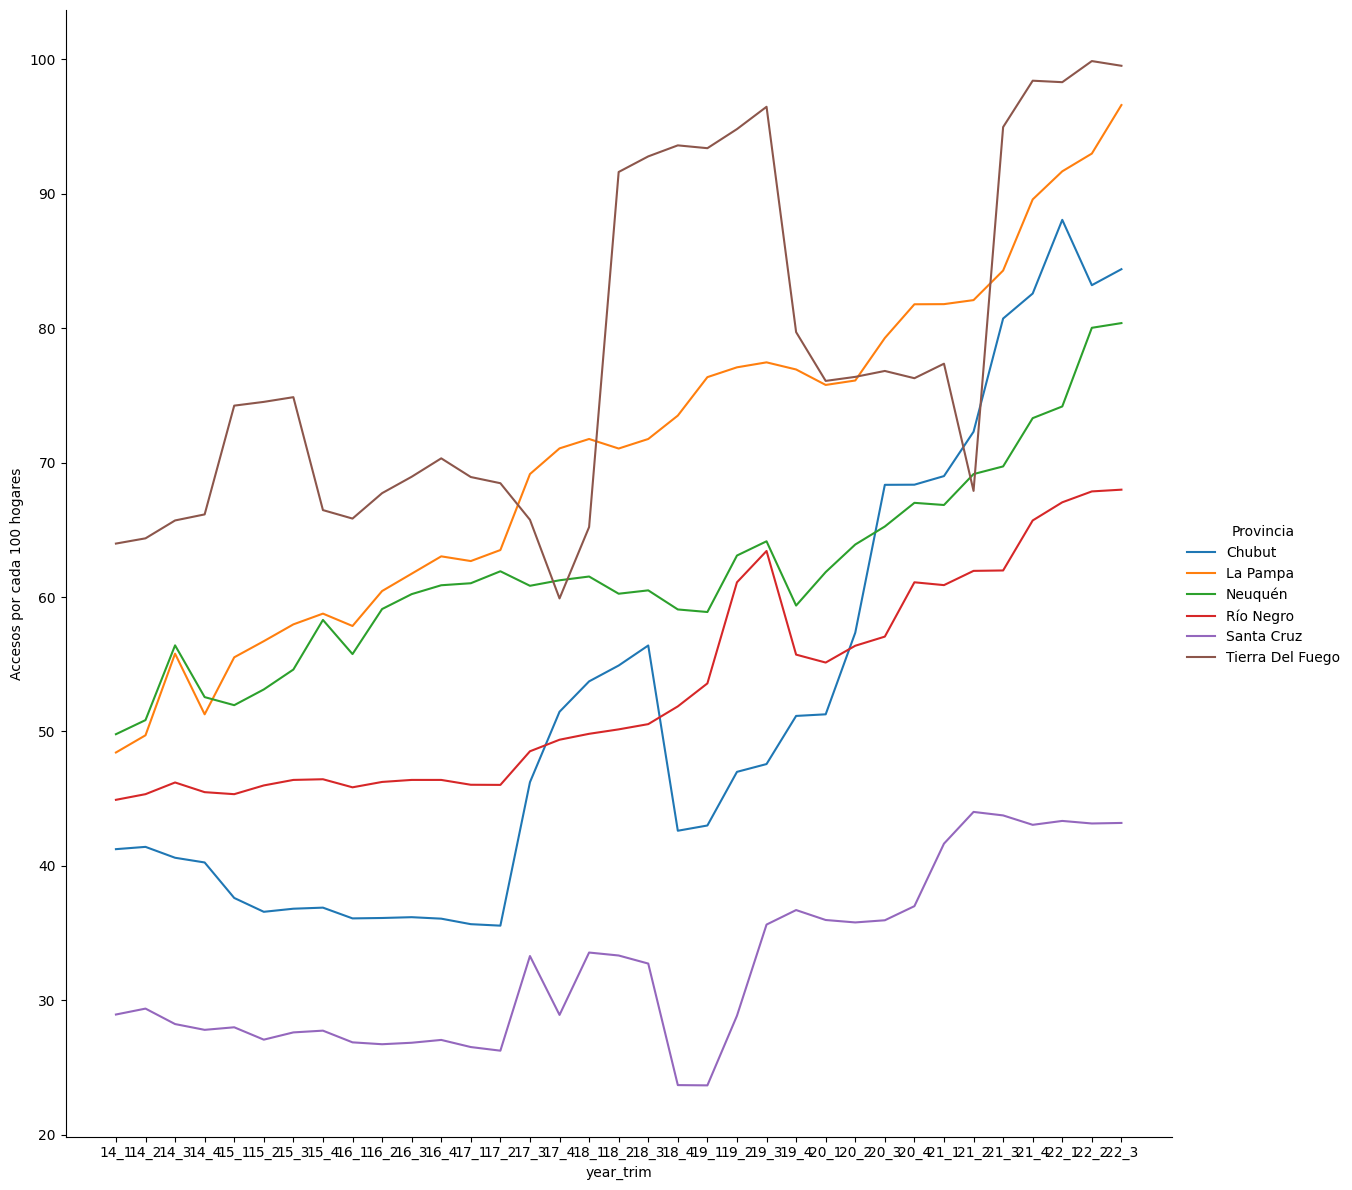

In [88]:
# Lista de provincias que quieres incluir en el gráfico
region_patagonica = ['La Pampa', 'Río Negro', 'Neuquén', 'Chubut', 'Santa Cruz', 'Tierra Del Fuego']

# Filtrar el DataFrame para incluir solo las provincias deseadas
df_filtered = df_hog_x_prov.query("Provincia in @region_patagonica")

# Ordenar el DataFrame según 'Año' y 'Trimestre'
df_filtered = df_filtered.sort_values(by=['Año', 'Trimestre'])

# Trazar el gráfico utilizando sns.relplot
sns.relplot(data=df_filtered, x='year_trim', y='Accesos por cada 100 hogares', hue='Provincia', height=12, kind='line')

# Mostrar el gráfico
plt.show()

# Conclusión 

# Todas las provincias muestran un aumento en el acceso a internet por cada 100 hogares, lo cual denota la mayor demanda del servicio en el país. 

# Tambián se pueden detectar casos de aumento diferencial en algunas regiones, por ejemplo: En la región cuyo se ve un incremente abrupto en las provincia de la Rioja y San Luis por sobre Mendoza y San Juan que tienen un incremento mas paulatino.

## Analisis Exploratorio: Tecnologias

In [89]:
df_tecnologias = pd.read_csv('Datasets_normalizados\Internet_Accesos-por-tecnologia.csv')

In [90]:
df_tecnologias.head(3)

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,3,1395277,6031970,2871541,55711,23523,11091128,Jul-Sept 2022
1,2022,2,1468333,5979214,2723285,556243,231609,10958684,Abr-Jun 2022
2,2022,1,1533240,6073426,2219533,545814,251996,10624009,Ene-Mar 2022


In [91]:
df_tecnologias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           35 non-null     int64 
 1   Trimestre     35 non-null     int64 
 2   ADSL          35 non-null     int64 
 3   Cablemodem    35 non-null     int64 
 4   Fibra óptica  35 non-null     int64 
 5   Wireless      35 non-null     int64 
 6   Otros         35 non-null     int64 
 7   Total         35 non-null     int64 
 8   Periodo       35 non-null     object
dtypes: int64(8), object(1)
memory usage: 2.6+ KB


In [92]:
#Contabilizamos valores nulos
df_tecnologias.isnull().sum()

Año             0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
Periodo         0
dtype: int64

In [93]:
#Contabilizamos valores duplicados
df_tecnologias.duplicated().sum()

0

In [94]:
df_tecnologias.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,35.000000,35.000000,3.500000e+01,3.500000e+01,3.500000e+01,35.000000,35.000000,3.500000e+01
mean,2017.885714,2.457143,3.040425e+06,4.122601e+06,7.390627e+05,224909.857143,123193.828571,8.297800e+06
std,2.564135,1.120474,8.354122e+05,1.225277e+06,7.861772e+05,177544.571827,96972.324891,1.399611e+06
min,2014.000000,1.000000,1.395277e+06,2.407330e+06,1.391870e+05,1653.000000,543.000000,6.398398e+06
25%,2016.000000,1.500000,2.279711e+06,2.966749e+06,1.679880e+05,81766.000000,55934.000000,7.057455e+06
50%,2018.000000,2.000000,3.557216e+06,4.038141e+06,2.262850e+05,155775.000000,71573.000000,8.110444e+06
75%,2020.000000,3.000000,3.723156e+06,5.132233e+06,1.138802e+06,364500.000000,239312.500000,9.260442e+06
max,2022.000000,4.000000,3.803024e+06,6.073426e+06,2.871541e+06,556243.000000,265328.000000,1.109113e+07


### Identificamos la distribución de los datos y outliers

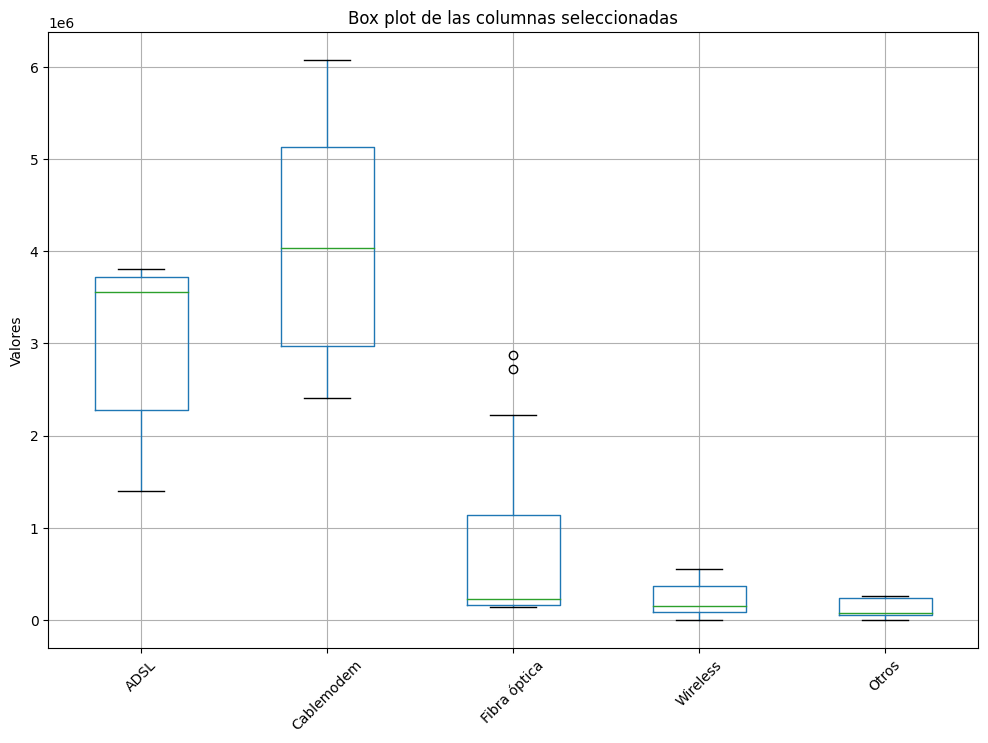

In [95]:
columnas_tecnologia = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

# Gráfico de caja para visualizar outliers de las columnas seleccionadas
plt.figure(figsize=(12, 8))
df_tecnologias[columnas_tecnologia].boxplot()
plt.title('Box plot de las columnas seleccionadas')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [96]:
df_tecnologias['year_trim'] = df_tecnologias.apply(lambda x: f'{x.Año - 2000}_{x.Trimestre}', axis=1)

## Graficamos el cambio de uso en las tecnologías en el paso del tiempo

<Axes: xlabel='year_trim', ylabel='Otros'>

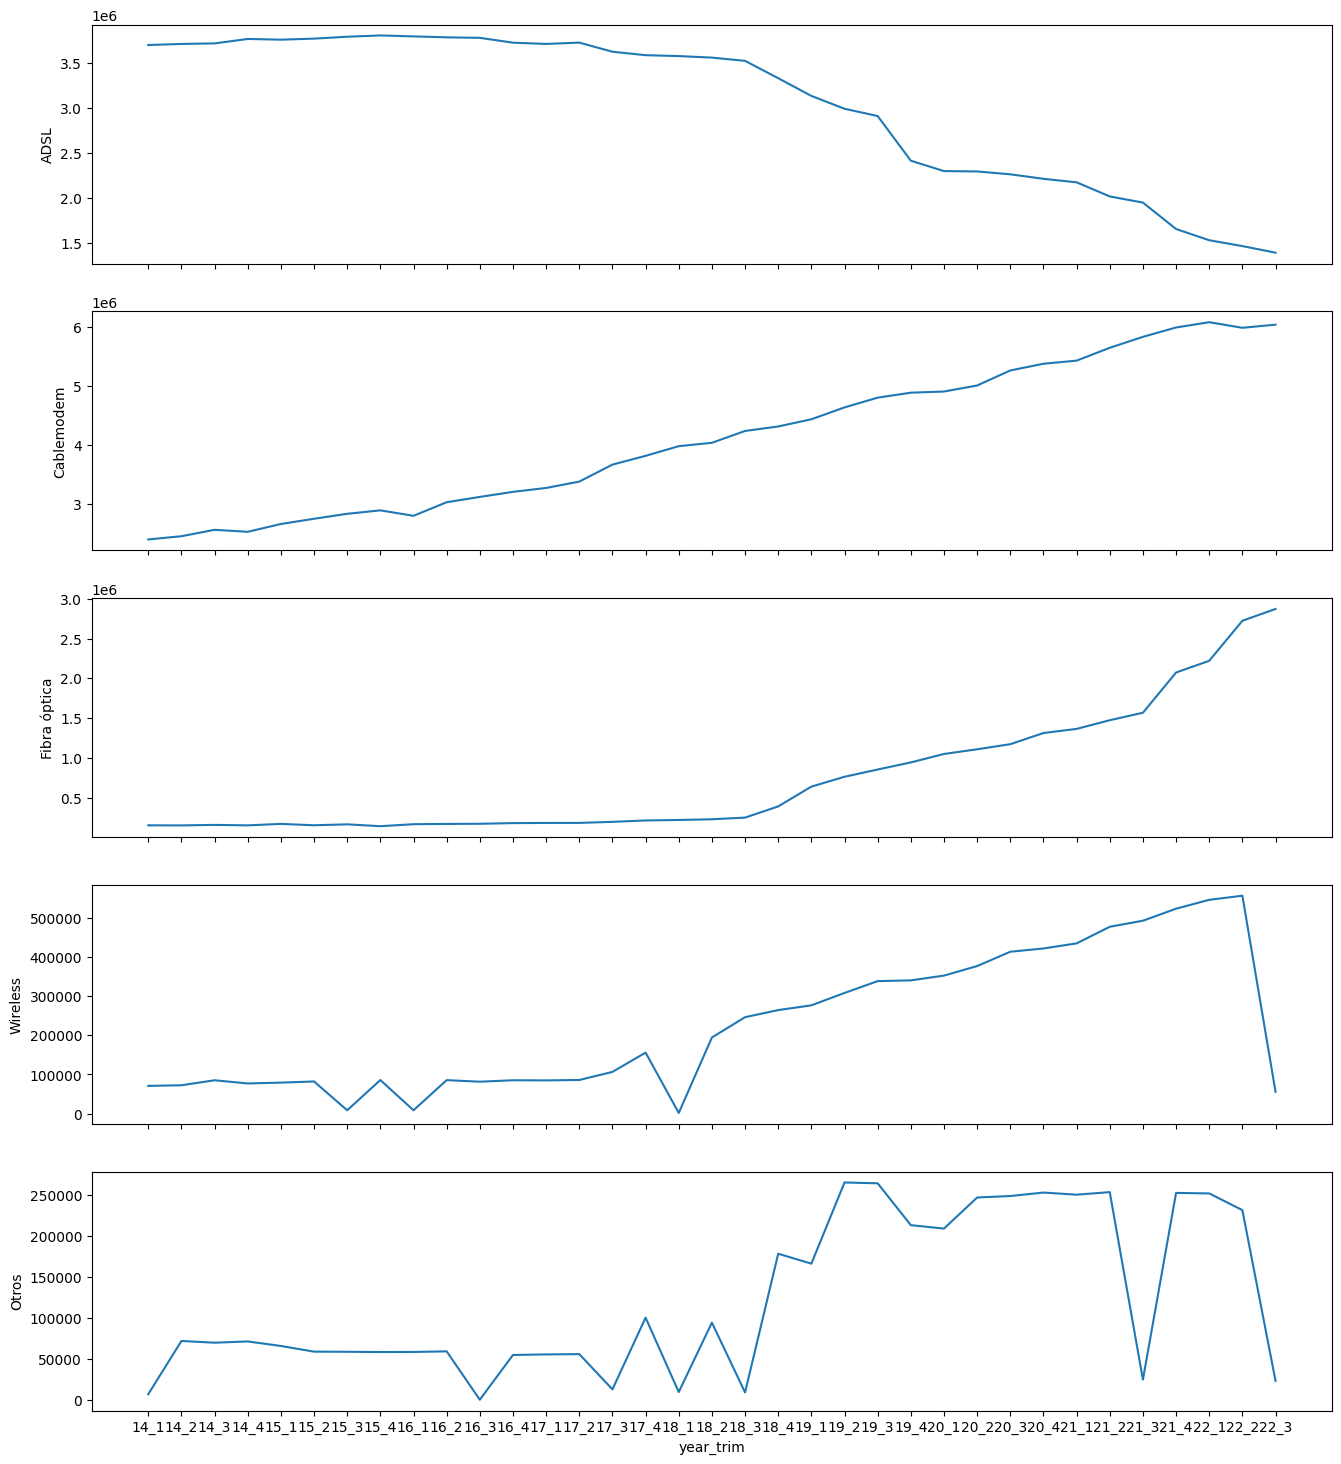

In [97]:
fig, axs = plt.subplots(5, sharex=True, figsize=(16, 18))

sns.lineplot(data=df_tecnologias.sort_values(by=['Año','Trimestre']), x='year_trim', y='ADSL', ax=axs[0])
sns.lineplot(data=df_tecnologias.sort_values(by=['Año','Trimestre']), x='year_trim', y='Cablemodem', ax=axs[1])
sns.lineplot(data=df_tecnologias.sort_values(by=['Año','Trimestre']), x='year_trim', y='Fibra óptica', ax=axs[2])
sns.lineplot(data=df_tecnologias.sort_values(by=['Año','Trimestre']), x='year_trim', y='Wireless', ax=axs[3])
sns.lineplot(data=df_tecnologias.sort_values(by=['Año','Trimestre']), x='year_trim', y='Otros', ax=axs[4])

## Análisis exploratorio de Tecnología, teniendo en cuenta las localidades

In [98]:
internet_fijo_tecnologia_loc = pd.read_csv('Datasets_normalizados\AccesosaInternetfijoportecnologiaylocalidad_2791751690319387778.csv')

In [99]:
internet_fijo_tecnologia_loc.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,873,4704,0,2,0,975,0,664,7.218
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,6,167,0,0,327,1.282
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6


In [100]:
internet_fijo_tecnologia_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      3142 non-null   object
 1   Partido        3142 non-null   object
 2   Localidad      3142 non-null   object
 3   Link Indec     3142 non-null   object
 4   ADSL           3142 non-null   int64 
 5   CABLEMODEM     3142 non-null   int64 
 6   DIAL UP        3142 non-null   int64 
 7   FIBRA OPTICA   3142 non-null   int64 
 8   OTROS          3142 non-null   int64 
 9   SATELITAL      3142 non-null   int64 
 10  WIMAX          3142 non-null   int64 
 11  WIRELESS       3142 non-null   int64 
 12  Total general  3142 non-null   object
dtypes: int64(8), object(5)
memory usage: 319.2+ KB


In [101]:
#Contabilizamos valores nulos
internet_fijo_tecnologia_loc.isnull().sum()

Provincia        0
Partido          0
Localidad        0
Link Indec       0
ADSL             0
CABLEMODEM       0
DIAL UP          0
FIBRA OPTICA     0
OTROS            0
SATELITAL        0
WIMAX            0
WIRELESS         0
Total general    0
dtype: int64

In [102]:
#Contabilizamos valores duplicados
internet_fijo_tecnologia_loc.duplicated().sum()

0

### Identificamos la distribución de los datos y outliers

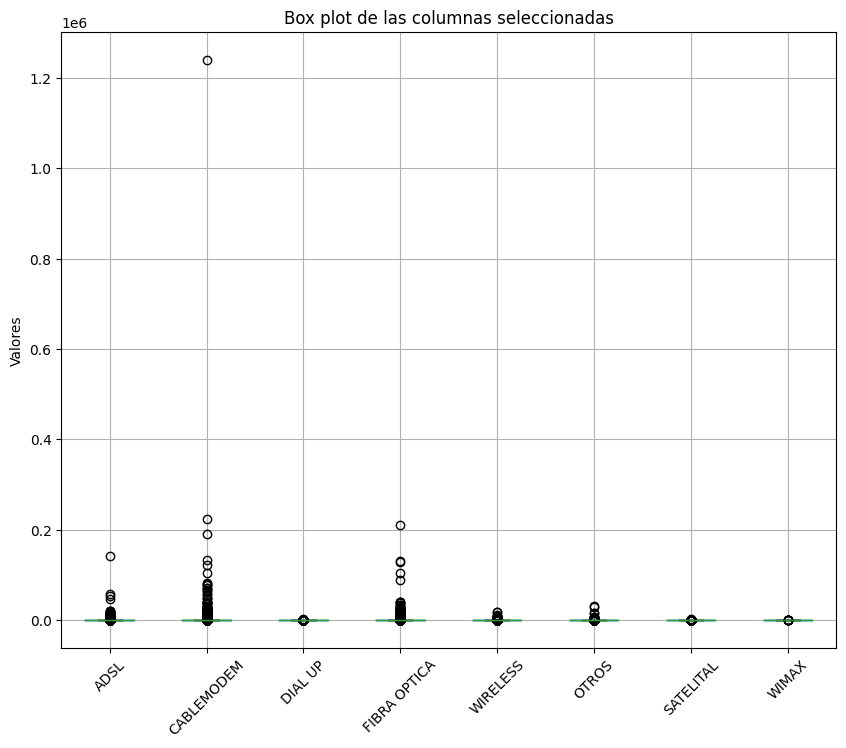

In [103]:
columnas_tecnologia_localidad = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'WIRELESS', 'OTROS', 'SATELITAL', 'WIMAX']

# Gráfico de caja para visualizar outliers de las columnas seleccionadas
plt.figure(figsize=(10, 8))
internet_fijo_tecnologia_loc[columnas_tecnologia_localidad].boxplot()
plt.title('Box plot de las columnas seleccionadas')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.grid(True)

In [104]:
internet_fijo_tecnologia_loc_group = internet_fijo_tecnologia_loc.groupby("Provincia")[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'WIRELESS', 'OTROS', 'SATELITAL', 'WIMAX']].sum().reset_index()

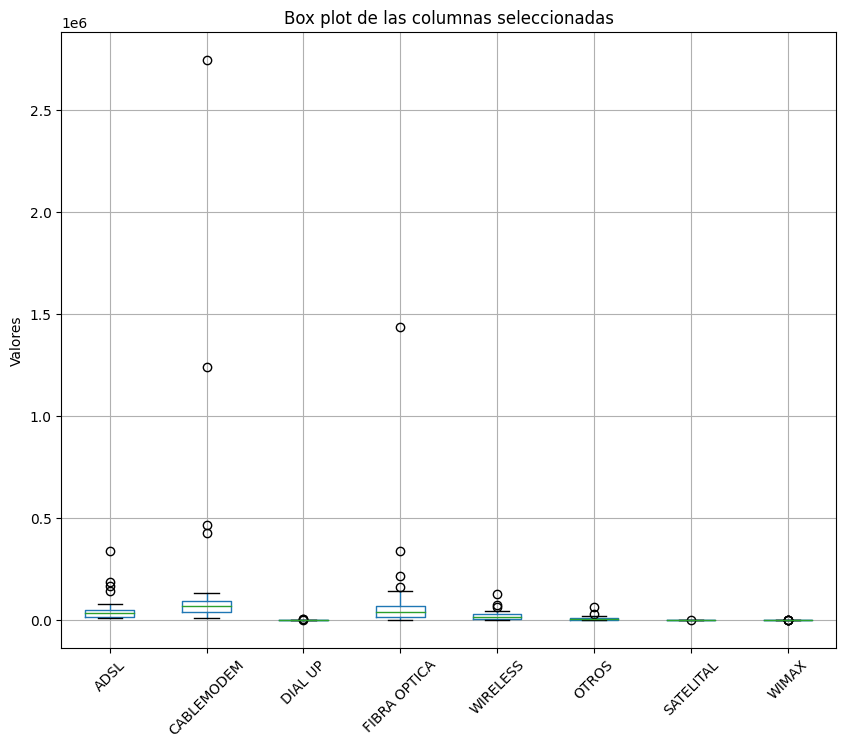

In [105]:
columnas_tecnologia_localidad_group = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'WIRELESS', 'OTROS', 'SATELITAL', 'WIMAX']

# Gráfico de caja para visualizar outliers de las columnas seleccionadas
plt.figure(figsize=(10, 8))
internet_fijo_tecnologia_loc_group[columnas_tecnologia_localidad_group].boxplot()
plt.title('Box plot de las columnas seleccionadas')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.grid(True)

## Explorando la Brecha Tecnológica: Un Análisis Provincial de las Tecnologías Ausentes y Oportunidades de Expansión

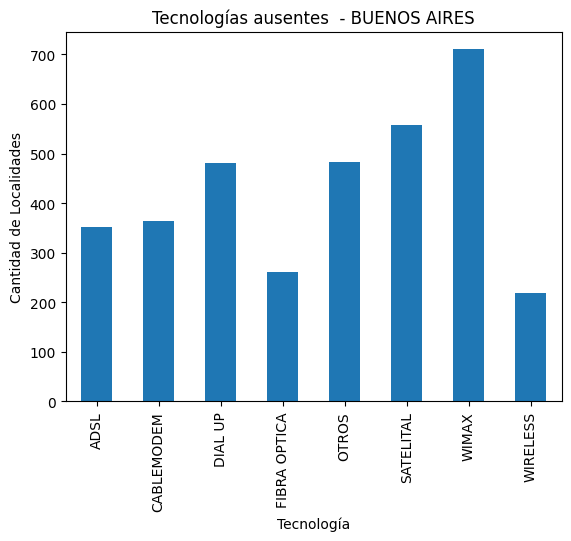

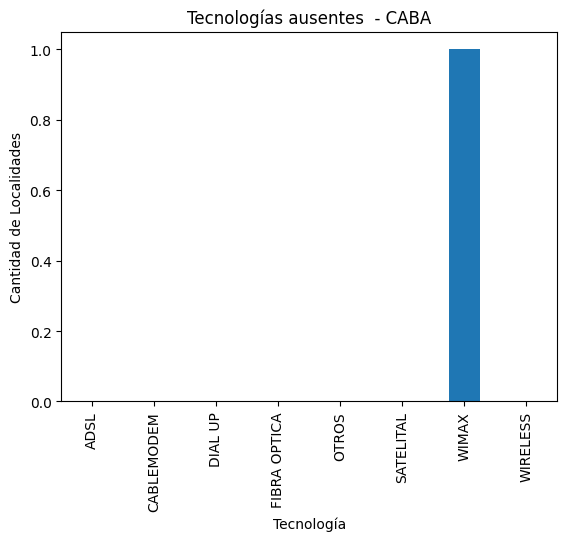

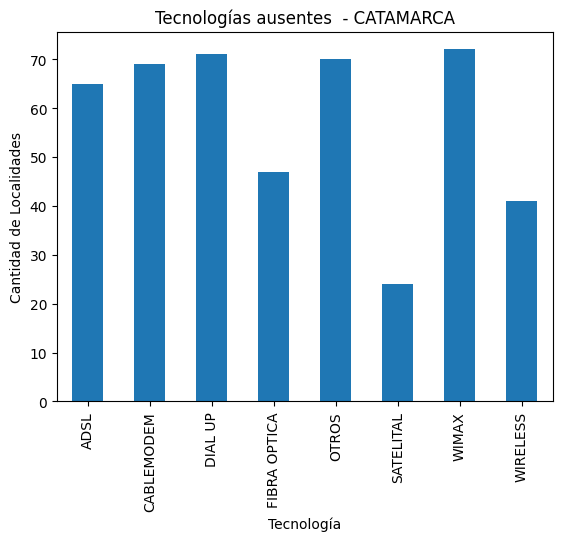

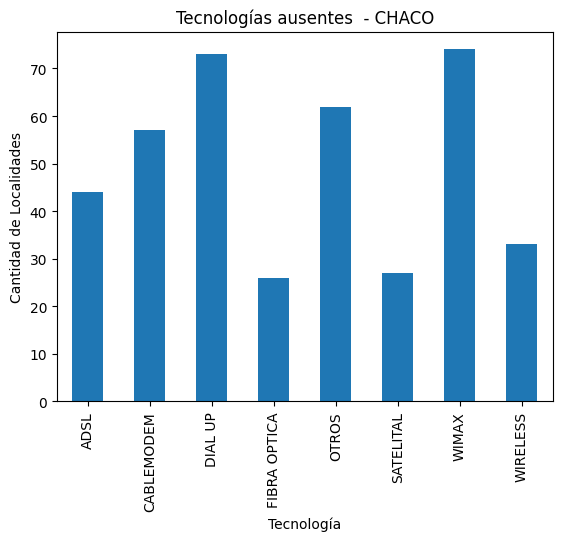

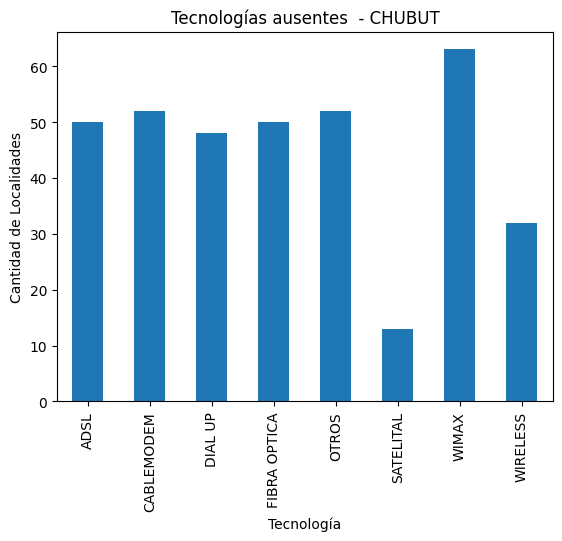

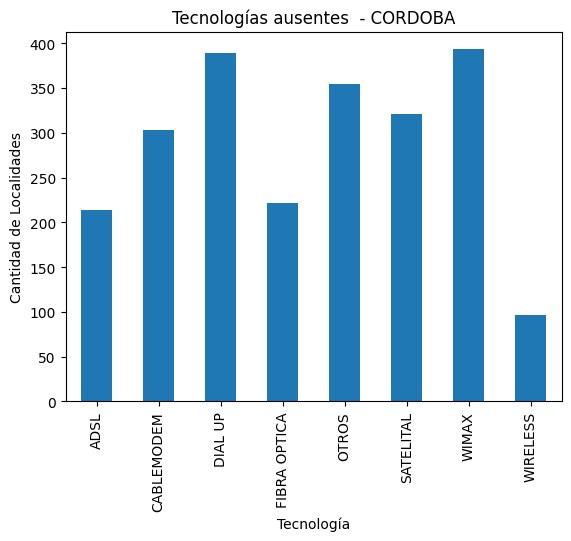

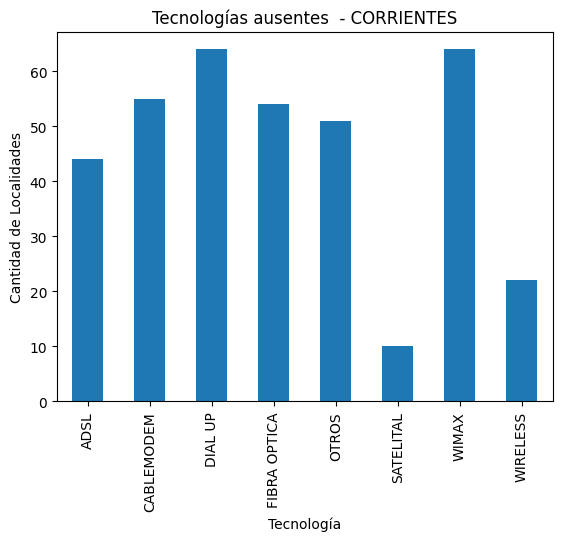

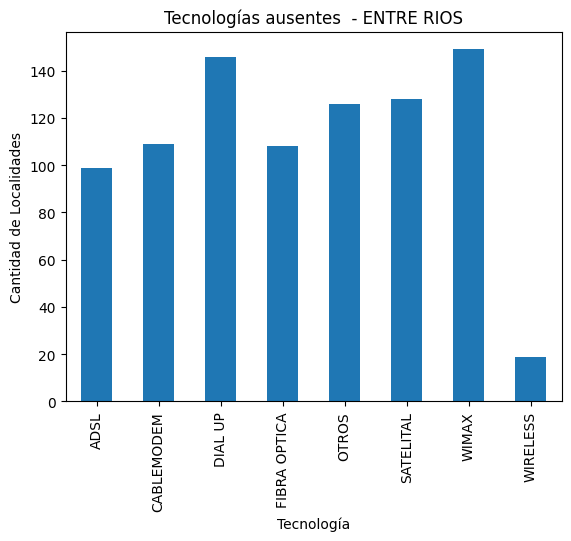

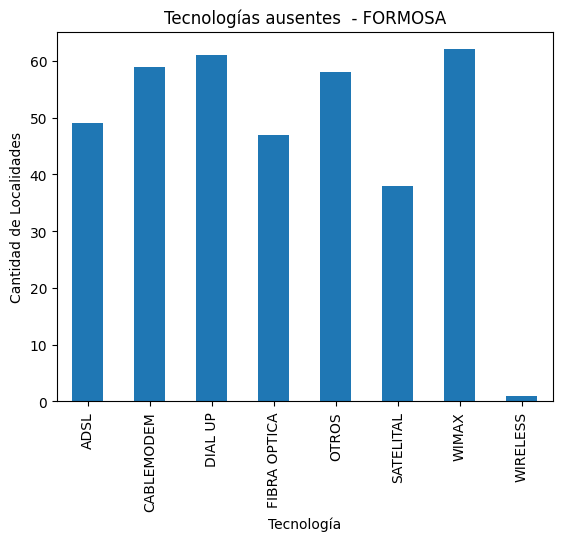

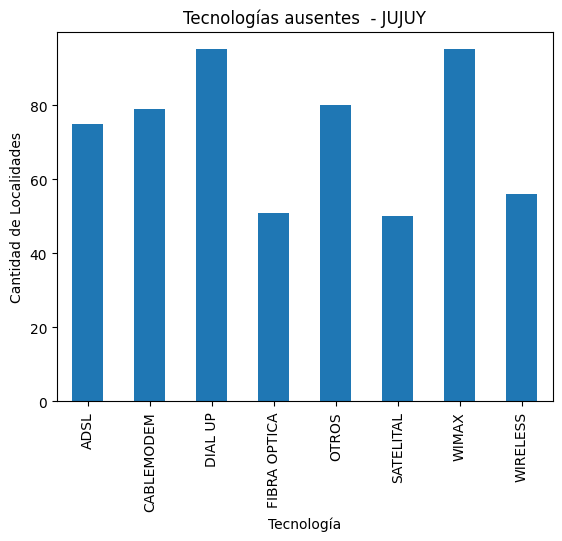

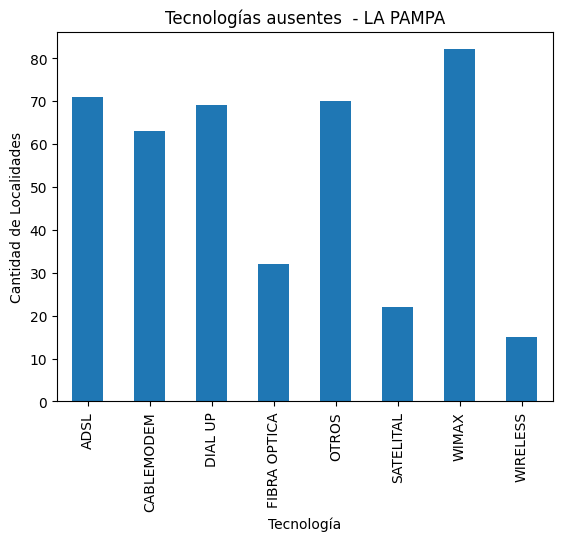

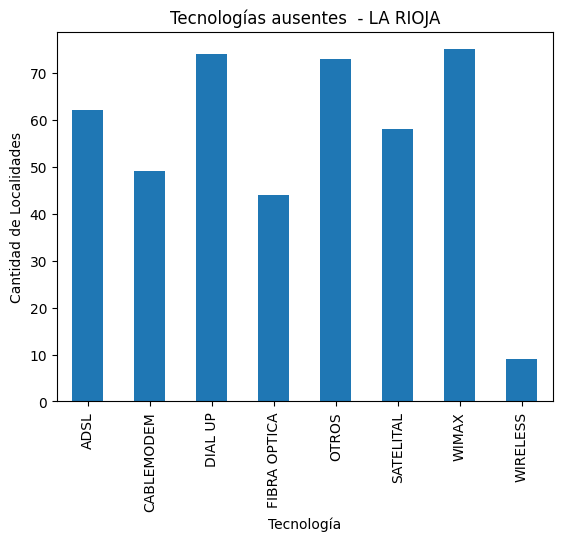

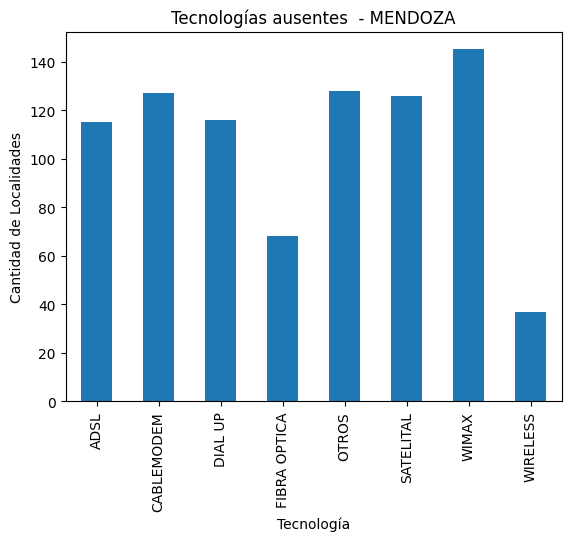

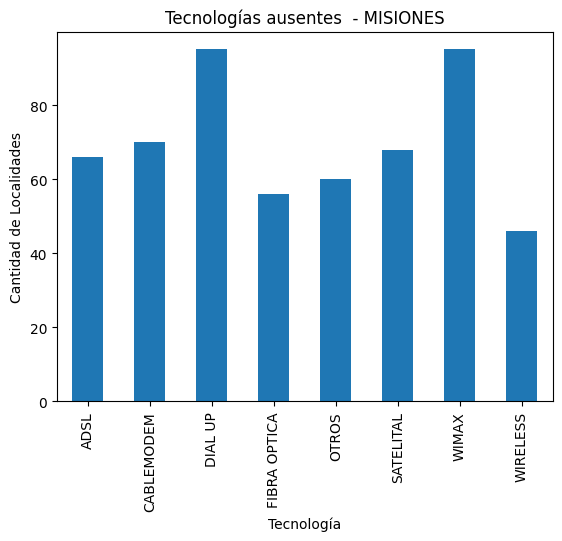

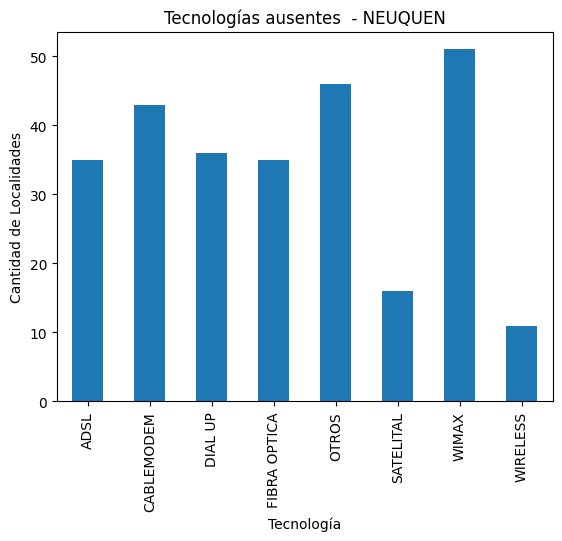

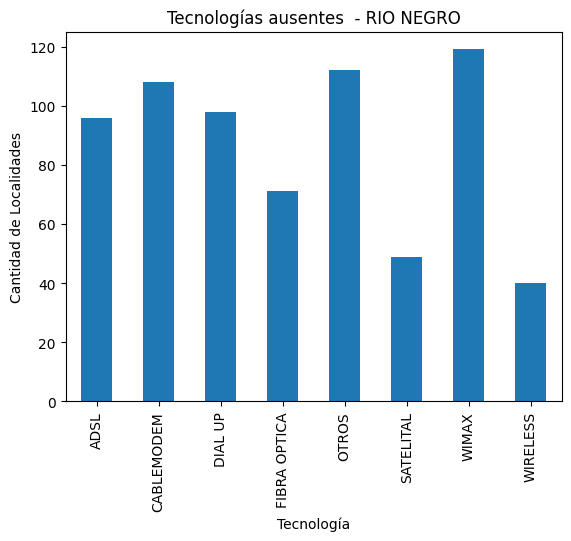

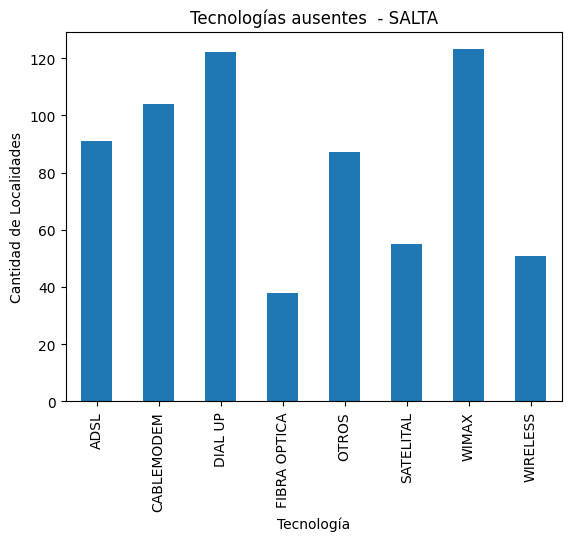

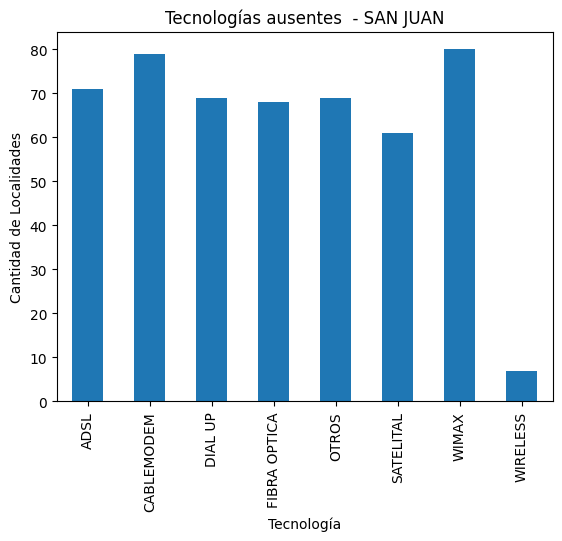

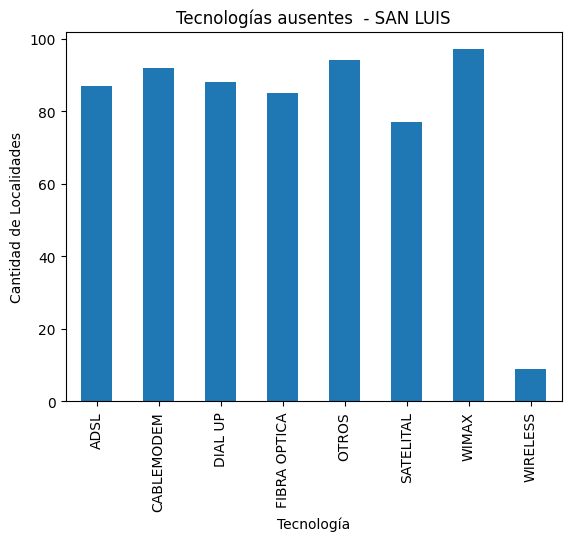

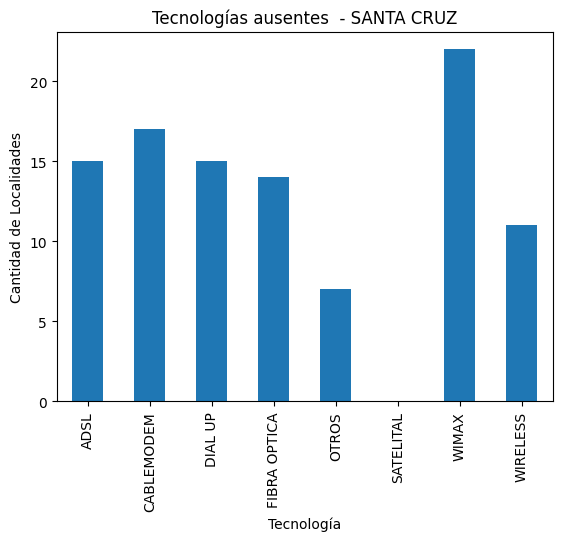

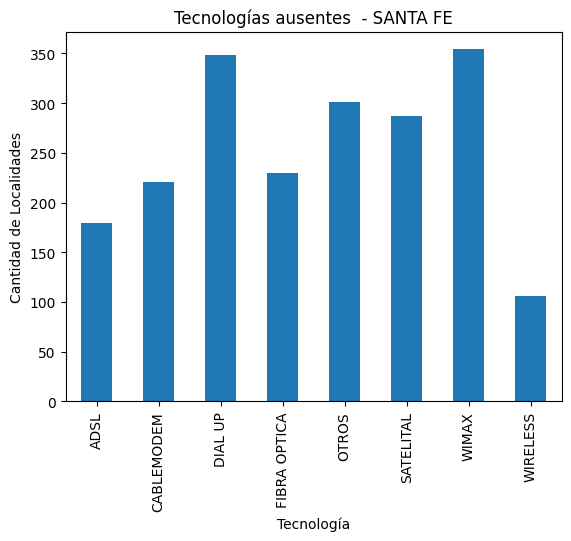

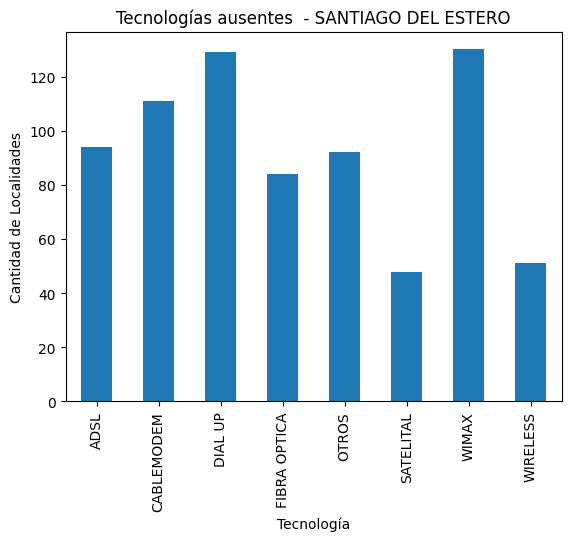

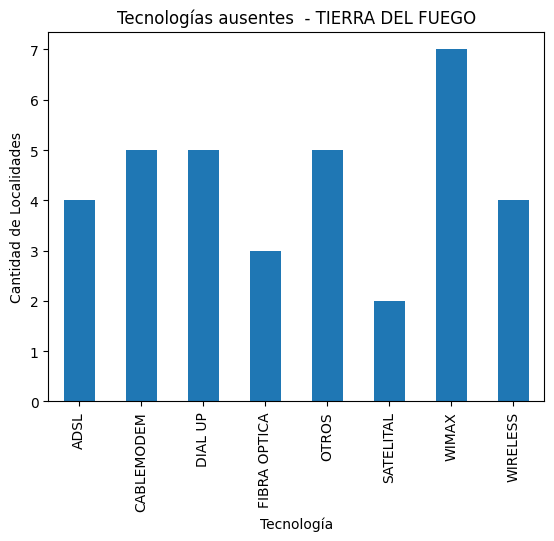

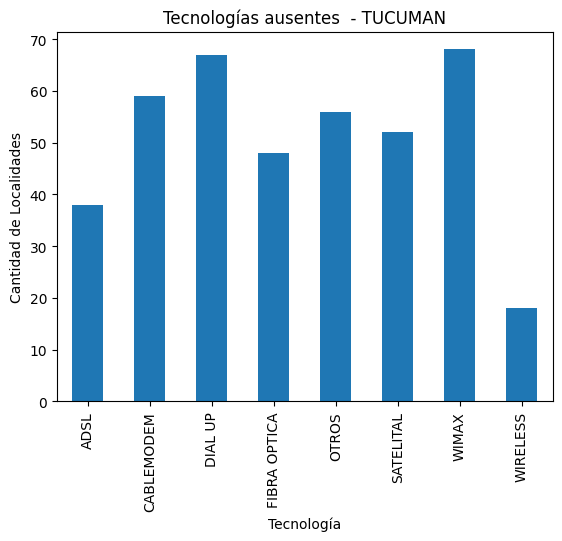

In [106]:
# Resumimos por Provincia las tecnologías ausentes en sus localidades
prov_loc = internet_fijo_tecnologia_loc.groupby('Provincia')[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']].apply(lambda x: (x == 0).sum())

# Generar gráficos de barras separados por provincia
for provincia in prov_loc.index:
    values = prov_loc.loc[provincia]
    values.plot(kind='bar')
    plt.xlabel('Tecnología')
    plt.ylabel('Cantidad de Localidades')
    plt.title(f'Tecnologías ausentes  - {provincia}')
    plt.show()

# Conclusión

## En este estudio, hemos identificado numerosas localidades que enfrentan carencias significativas en cuanto a la calidad del servicio de internet. Aunque nuestro análisis no abarcó el estudio de las economías regionales, es evidente que los grandes centros urbanos han sido favorecidos con una infraestructura adecuada a sus poblaciones. 
## Así también las tendencias resaltan la importancia de abordar la brecha digital y la necesidad de invertir en infraestructuras de comunicación en áreas subatendidas.

## Analisis Exploratorio Ingresos 

In [107]:
df_ingresos =pd.read_csv('Datasets_normalizados\Internet_Ingresos.csv')

In [108]:
df_ingresos.head(3)

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,3,67055930,Jul-Sept 2022
1,2022,2,60335724,Abr-Jun 2022
2,2022,1,55589997,Ene-Mar 2022


In [109]:
df_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        35 non-null     int64 
 1   Trimestre                  35 non-null     int64 
 2   Ingresos (miles de pesos)  35 non-null     int64 
 3   Periodo                    35 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.2+ KB


In [110]:
#Contabilizamos valores nulos
df_ingresos.isnull().sum()

Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64

In [111]:
#Contabilizamos valores nulos
df_ingresos.duplicated().sum()

0

### Identificamos la distribución de los datos y outliers

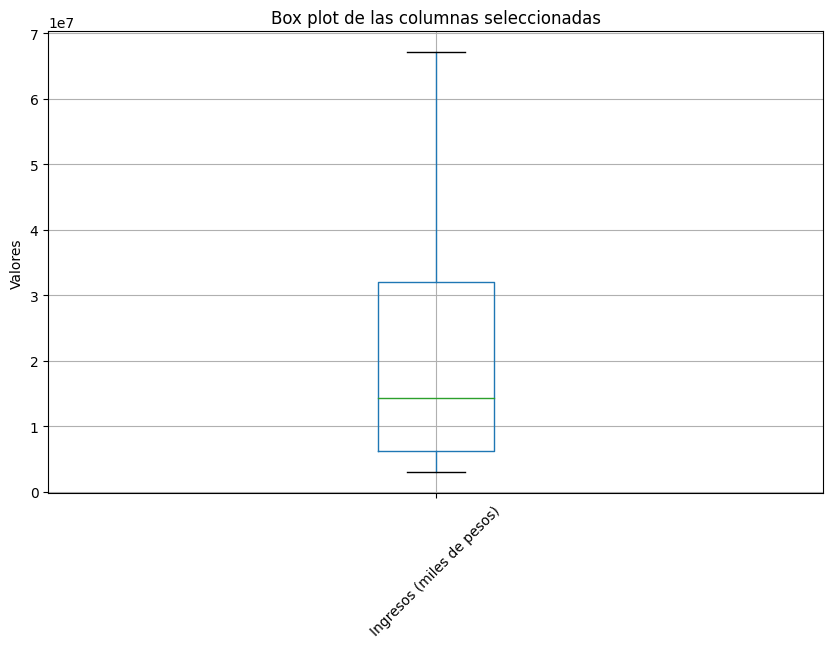

In [112]:
columnas_ingresos = ['Ingresos (miles de pesos)']

# Gráfico de caja para visualizar outliers de las columnas seleccionadas
plt.figure(figsize=(10, 6))
df_ingresos[columnas_ingresos].boxplot()
plt.title('Box plot de las columnas seleccionadas')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Visualizamos la tendencia de ingresos por año

In [113]:
df_ingresos_al_año = df_ingresos.groupby('Año')['Ingresos (miles de pesos)'].sum().reset_index()

In [114]:
df_ingresos_al_año

,Año,Ingresos (miles de pesos)
0,2014,13683949
1,2015,20108814
2,2016,26867508
3,2017,39671973
4,2018,59539594
5,2019,86772531
6,2020,127585840
7,2021,163383869
8,2022,182981651


Text(0.5, 1.0, 'Ingresos por miles al año')

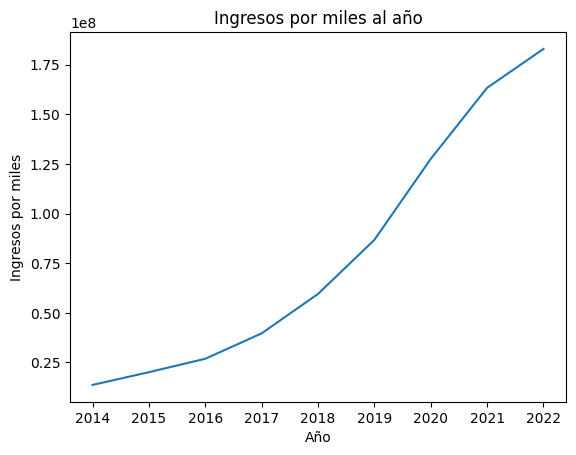

In [115]:
#Creamos el grafico
plt.plot(df_ingresos_al_año['Año'], df_ingresos_al_año['Ingresos (miles de pesos)'])
plt.xlabel('Año')
plt.ylabel('Ingresos por miles')
plt.title('Ingresos por miles al año')

### Empleamos el dataset " Acceso Histórico por velocidad" que no incluye las provincias para establecer una relación entre los ingresos y los Mbps brindados en el tiempo

In [116]:
df_historico = pd.read_csv('Datasets_normalizados\historico_velocidad_internet.csv')

## Graficamos las fluctuaciones en los ingresos en relación con las velocidades proveidas 

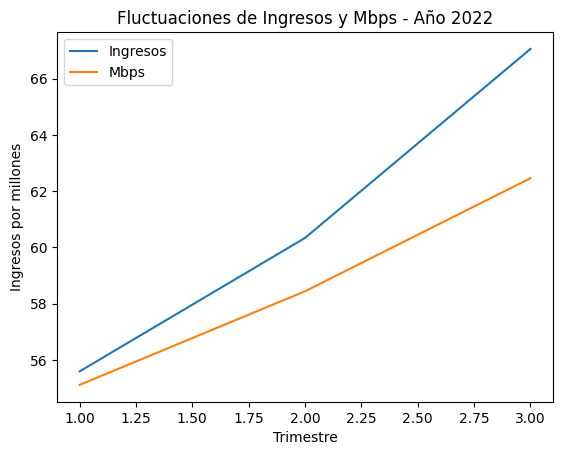

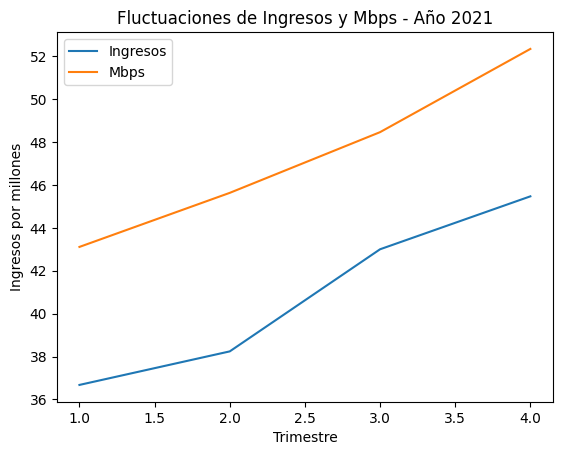

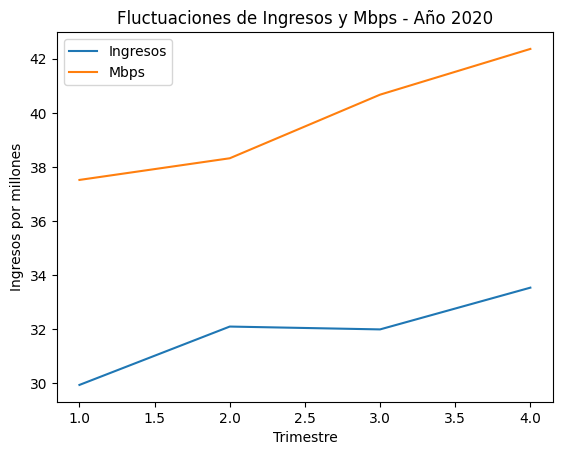

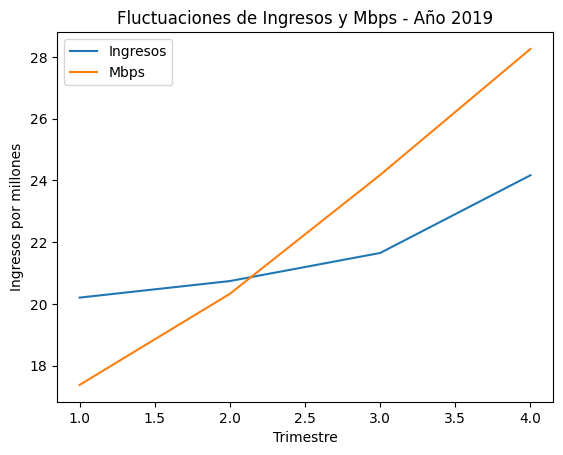

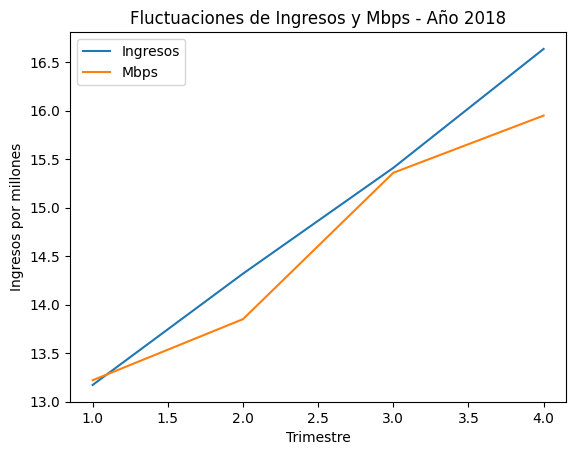

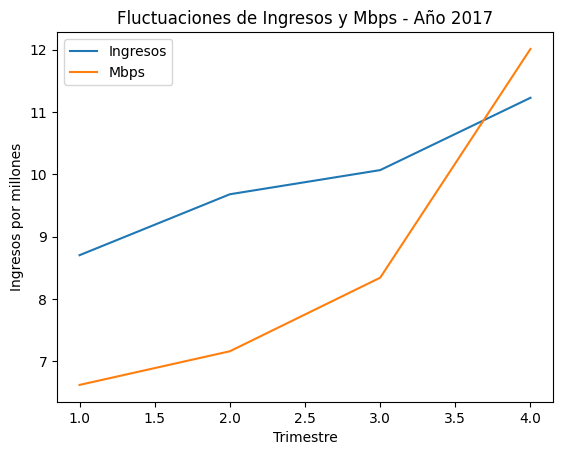

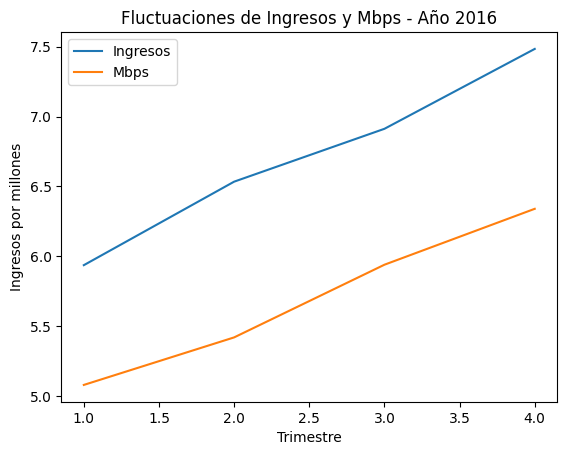

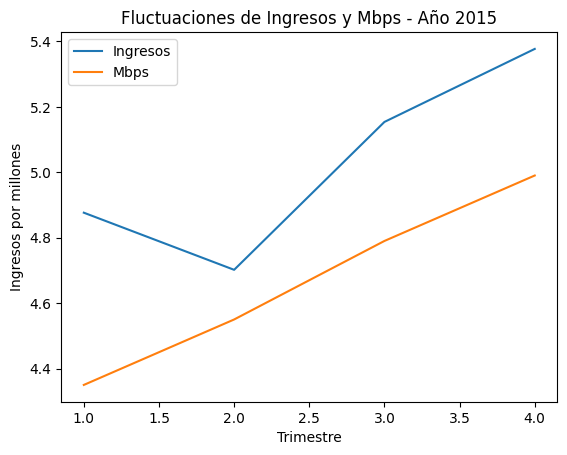

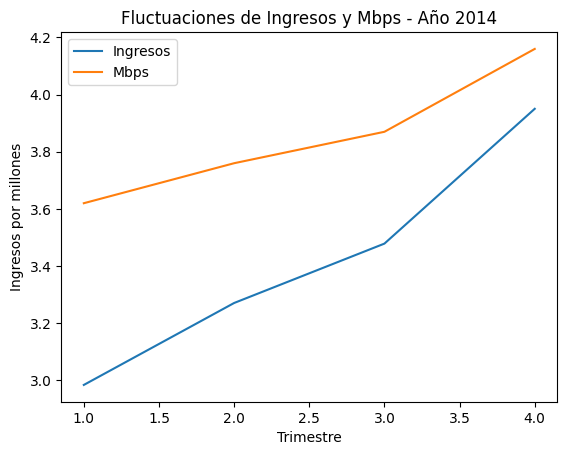

In [117]:

# Unir los dataframes por las columnas "Año" y "Trimestre"
df_ingresos_vs_velocidad = df_ingresos.merge(df_historico, on=['Año', 'Trimestre'])
df_ingresos_vs_velocidad['Ingresos (miles de pesos)'] = df_ingresos_vs_velocidad['Ingresos (miles de pesos)'] / 1000000

# Graficar las fluctuaciones para cada año
years = df_ingresos_vs_velocidad['Año'].unique()

for year in years:
    df_year = df_ingresos_vs_velocidad[df_ingresos_vs_velocidad['Año'] == year]
    plt.plot(df_year['Trimestre'], df_year['Ingresos (miles de pesos)'], label='Ingresos')
    plt.plot(df_year['Trimestre'], df_year['Mbps (Media de bajada)'], label='Mbps')
    plt.xlabel('Trimestre')
    plt.ylabel('Ingresos por millones')
    plt.title(f'Fluctuaciones de Ingresos y Mbps - Año {year}')
    plt.legend()
    plt.show()

### Conclusión 

### Se puede apreciar un constante aumento de la velocidad de internet en el tiempo, acompañado por un incremento de los ingresos 

# Conclusión Final

### Nuestro análisis revela un mercado prometedor y receptivo a los servicios de internet de calidad en Argentina. La sólida infraestructura existente ha permitido implementar rápidas actualizaciones tecnológicas, lo que se traduce en una máxima penetración del acceso a internet en los centros urbanos. Además, vislumbramos excelentes oportunidades para expandir la prestación de servicios en áreas que aún carecen de velocidades y calidad tecnológica actualizada, esto sumado a la potencial expansión de tecnologías como el 5G aumentara aún mas el alcance, llegando a zonas rurales alejadas donde se desarrollan muchas de las actividades de las que dependen la economía del país. 